# Week 3
####### Nan: 2000(357), 2004(1176,1109), 2015(440), 2018(116,134); Goal: Timeseries of MLD change (season,  region)

### Import all necessary packages

In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr

### Test applicability of 5m as surface water cut-off

In [3]:
years = []
npfilelen = []
for year in range(1977,2020): # to 2010
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    years.append(year)
    npfilelen.append(len(npfile))
    

In [4]:
print(sum(npfilelen))
# Percentage of profiles with pressure measurements starting 
# at greater than 5m is approximately (rounded up) 0.25%. 

60662


In [5]:
years = []
npfilelen = []
yearsday = []
for year in range(1977,2020): # to 2010
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    years.append(year)
    npfilelen.append(len(npfile))
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lat = npfile[i]['lat']
        lon = npfile[i]['lon']
        floordepth = npfile[i]['depth']
        if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59: # Can try seasons / months
            yearsday.append(yd)

In [6]:
print(len(yearsday))

8454


In [7]:
sum = 60662
total = 15126 

### Find mixed level depth using 0.2°C change as threshold (general region)

In [1]:
for year in range(2009,2010):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lat = npfile[i]['lat']
        lon = npfile[i]['lon']
        floordepth = npfile[i]['depth']
#         if yd <= 31: #273 to 304 Try very small range
        if yd > 160 and yd <= 161: # Can try seasons / months
            print('day:',yd, '---', 'lon:',lon, '---','lat:',lat)
#             print('')
            print('floor depth:              ', floordepth)
            df_pts = pd.DataFrame({'p':p,'t':t})
            df_ptsnew = df_pts.dropna()
            df_final = pd.DataFrame(df_ptsnew.values) # 0 is pressure, 1 is temperature
#             print(df_final)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            print('surfacetemp avg of top 6m:', surfacevalmean)
            print(df_final)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                print(i, b)
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    print('temperature at depth:     ',b)
                    print('depth:                    ',dffin.at[i,'pressure'])
                    if dffin.at[i,'pressure'] >= floordepth - 6:
                        print('ALL MIXED')
                        pnew.append(dffin.at[i,'pressure'])
                        if len(pnew) > 0:
                            yplottable = pnew[0]*-1
                            
                        plt.style.use('seaborn-white')  
                        plt.plot(df_final[1],df_final[0]*-1,color='blue')
                        plt.axhline(y=yplottable, color='r', linestyle='--')
                        plt.xlabel('Temperature (°C)')
                        plt.ylabel('Pressure (m)')
                        plt.grid(False)
                        plt.show()                        
                        print('----------------------------------------------')
                    elif dffin.at[i,'pressure'] == df_final[0].iloc[-1]:
                        print('INCONCLUSIVE')
                        print('----------------------------------------------')
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        if len(pnew) > 0:
                            yplottable = pnew[0]*-1

                        plt.style.use('seaborn-white')  
                        plt.plot(df_final[1],df_final[0]*-1,color='blue')
                        plt.axhline(y=yplottable, color='r', linestyle='--')
                        plt.xlabel('Temperature (°C)')
                        plt.ylabel('Pressure (m)')
                        plt.grid(False)
                        plt.show()
                        print('----------------------------------------------')                        
                    break
#                 elif b <  (surfacevalmean + 0.2) or b <  (surfacevalmean + 0.2):
#                     print(i)
#                     break
#                     print('no')
#                     break

NameError: name 'scipy' is not defined

### Download ETOPO1 and plot locations of regions

In [2]:
file_in ='Etopo1_Bed_35_65N_40_80W.nc'
NC=Dataset(file_in); DS=xr.open_dataset(file_in)

In [3]:
projection= ccrs.PlateCarree(central_longitude=255);
data_crs = ccrs.PlateCarree()

In [6]:
indices = np.argwhere(np.any(depthNC == 200, axis=1))

NameError: name 'depthNC' is not defined

In [7]:
print(len(indices))

NameError: name 'indices' is not defined

In [43]:
val_lat_list = []
val_lon_list = []
for i in indices:
#     print(lonNC[i],latNC[i])
    val_lat = latNC[i]
    val_lon = -(360 - lonNC[i])
    val_lat_list.append(float(val_lat))
    val_lon_list.append(float(val_lon))
#     print(val_lon,val_lat)

In [46]:
print(val_lat_list)

[35.56666666666669, 35.66666666666669, 35.68333333333336, 35.71666666666669, 35.766666666666694, 35.800000000000026, 35.81666666666669, 35.83333333333336, 35.88333333333336, 35.96666666666669, 36.00000000000003, 36.016666666666694, 36.050000000000026, 36.06666666666669, 36.08333333333336, 36.10000000000003, 36.16666666666669, 36.18333333333336, 36.200000000000024, 36.21666666666669, 36.23333333333336, 36.25000000000003, 36.28333333333336, 36.300000000000026, 36.31666666666669, 36.33333333333336, 36.35000000000003, 36.38333333333336, 36.40000000000003, 36.41666666666669, 36.50000000000003, 36.550000000000026, 36.63333333333336, 36.71666666666669, 36.766666666666694, 36.800000000000026, 36.866666666666696, 37.10000000000003, 37.13333333333336, 37.16666666666669, 37.200000000000024, 37.23333333333336, 37.28333333333336, 37.40000000000003, 37.43333333333336, 37.46666666666669, 37.48333333333336, 37.50000000000003, 37.516666666666694, 37.58333333333336, 37.60000000000003, 37.68333333333336,

In [58]:
print(depthNC.shape)

(1801, 2401)


In [59]:
latNC= NC['lat'][:]
lonNC= NC['lon'][:]
depthNC= NC['depth'][:]

In [5]:
import re
w = open("bndgb2.txt", "r", encoding="utf-8")
w.read()
w = '  40.00   69.50\n  40.30   68.00\n  40.40   67.50\n  40.60   67.00\n  40.80   66.50\n  41.45   66.00\n  41.80   65.70\n  42.10   66.00\n  42.10   67.00\n  42.10   67.50\n  41.80   68.00\n  41.10   69.00\n  41.00   69.50\n  40.00   69.50\n'
output1w = w.split('\n')

neww = [] 
for string in output1w:
    output2w = string.split(' ')
    neww.append(output2w)

neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []

for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})

lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']

In [6]:
polygon_w = Polygon(df_w.values)
print(polygon_w)

POLYGON ((69.5 40, 68 40.3, 67.5 40.4, 67 40.6, 66.5 40.8, 66 41.45, 65.7 41.8, 66 42.1, 67 42.1, 67.5 42.1, 68 41.8, 69 41.1, 69.5 41, 69.5 40))


In [7]:
v = open("bndmbs.txt", "r", encoding="utf-8")
v.read()
v = '  37.00   76.00\n  36.00   75.50\n  35.50   75.00\n  36.00   74.75\n  37.40   74.50\n  39.50   72.00\n  40.50   74.00\n  39.40   74.25\n  37.00   76.00\n'
output1v = v.split('\n')

newv = [] 
for string in output1v:
    output2v = string.split(' ')
    newv.append(output2v)

newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []

for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})


lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']

In [8]:
polygon_v = Polygon(df_v.values.tolist())
print(polygon_v)

POLYGON ((76 37, 75.5 36, 75 35.5, 74.75 36, 74.5 37.4, 72 39.5, 74 40.5, 74.25 39.4, 76 37))


In [9]:
x = open("bndmbn.txt", "r", encoding="utf-8")
x.read()
x = '  40.50   74.00\n  39.50   72.00\n  40.00   71.40\n  40.00   69.50\n  41.00   69.50\n  41.10   70.00\n  41.00   72.00\n  40.50   74.00\n'
output1x = x.split('\n')

newx = [] 
for string in output1x:
    output2x = string.split(' ')
    newx.append(output2x)
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []

for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})

lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

In [10]:
polygon_x = Polygon(df_x.values.tolist())
print(polygon_x)

POLYGON ((74 40.5, 72 39.5, 71.40000000000001 40, 69.5 40, 69.5 41, 70 41.1, 72 41, 74 40.5))


In [11]:
y = open("bndgme.txt", "r", encoding="utf-8")
y.read()
y = '  41.80   68.00\n  42.10   67.50\n  42.10   67.00\n  42.10   66.00\n  43.00   66.00\n  44.20   66.50\n  44.20   67.00\n  44.20   68.00\n  41.80   68.00\n'
output1y = y.split('\n')

newy = [] 
for string in output1y:
    output2y = string.split(' ')
    newy.append(output2y)
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []

for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})

lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

In [12]:
polygon_y = Polygon(df_y.values)
print(polygon_y)

POLYGON ((68 41.8, 67.5 42.1, 67 42.1, 66 42.1, 66 43, 66.5 44.2, 67 44.2, 68 44.2, 68 41.8))


In [13]:
t = open("bndgmw.txt", "r", encoding="utf-8")
t.read()
t = '  42.20   70.50\n  42.00   70.00\n  41.10   69.00\n  41.80   68.00\n  44.20   68.00\n  43.90   69.00\n  43.70   70.00\n  43.00   70.50\n  42.20   70.50'
output1t = t.split('\n')
newt = [] 
for string in output1t:
    output2t = string.split(' ')
    newt.append(output2t)
lon_t = []; lat_t = []

for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})

lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

In [14]:
polygon_t = Polygon(df_t.values)
print(polygon_t)

POLYGON ((70.5 42.2, 70 42, 69 41.1, 68 41.8, 68 44.2, 69 43.9, 70 43.7, 70.5 43, 70.5 42.2))


In [52]:
depthNC[depthNC <= -500] = np.nan

In [53]:
print(np.nanmax(depthNC))
print(np.nanmin(depthNC))
print(np.nanmean(depthNC))

2104.0
-499.0
161.0245266751564


In [28]:
import numpy.ma as ma

depthNC[depthNC >= -500] = np.nan

newdepth = ma.masked_where(depthNC >= -500, depthNC)
newdepth_new = ma.masked_where(newdepth <= 500, newdepth)

In [69]:
print(np.max(depthNC))
print(np.mean(depthNC))
print(np.min(depthNC))

2104.0
-1532.348651924367
-6008.0


In [30]:
print(newdepth)

[[-- -- -- ... -3853.0 -3849.0 -3845.0]
 [-- -- -- ... -3854.0 -3854.0 -3850.0]
 [-- -- -- ... -3827.0 -3832.0 -3832.0]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


In [33]:
print(newdepth_new)
print(np.max(newdepth_new))

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
--


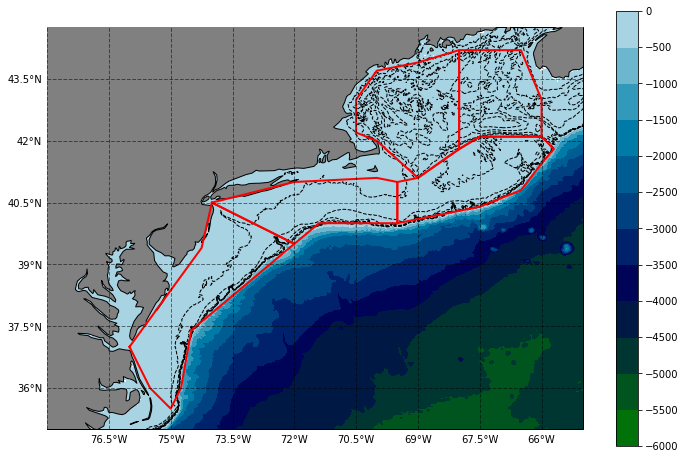

In [74]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-78, -65, 35, 44.75], ccrs.PlateCarree())
# feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='grey')
# ax.add_feature(feature)
cbarticks = np.arange(-6000.0,500.0, 500.0)
cf=ax.contourf(lonNC, latNC, depthNC, cbarticks, vmin = -6000, vmax = 500, transform=data_crs,cmap = 'ocean')
cbar = plt.colorbar(cf, ax=ax, ticks = cbarticks)

ax.contour(lonNC, latNC, depthNC, [-300,-250,-200,-150,-100,-50], linewidths=1,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='grey')
ax.add_feature(feature,zorder=5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--',zorder = 40)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plot(x_w,y_w,color='red', linewidth = 2, linestyle='-',zorder=10) #Georges Bank
plot(x_v,y_v,color='red', linewidth = 2, linestyle='-',zorder=10) #Southern MAB
plot(x_x,y_x,color='red', linewidth = 2, linestyle='-',zorder=10) #Northern MAB
plot(x_y,y_y,color='red', linewidth = 2, linestyle='-',zorder=10) #Eastern GoM
plot(x_t,y_t,color='red', linewidth = 2, linestyle='-',zorder=10) #Western GoM

plt.savefig('regiondisplay')
plt.show()

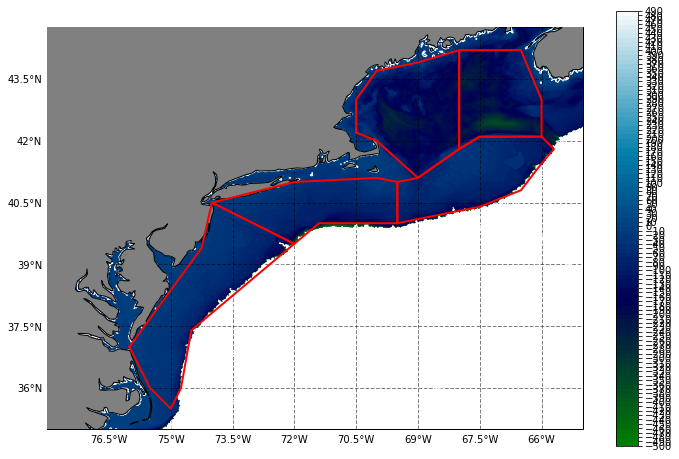

In [17]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-78, -65, 35, 44.75], ccrs.PlateCarree())
# feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='grey')
# ax.add_feature(feature)
cbarticks = np.arange(-500.0,500.0, 10.0)
cf=ax.contourf(lonNC, latNC, depthNC, cbarticks, vmin = -500, vmax = 500, transform=data_crs,cmap = 'ocean')
cbar = plt.colorbar(cf, ax=ax, ticks = cbarticks)

ax.contour(lonNC, latNC, depthNC, levels=15, linewidths=1,colors='white',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='grey')
ax.add_feature(feature,zorder=5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plot(x_w,y_w,color='red', linewidth = 2, linestyle='-',zorder=10) #Georges Bank
plot(x_v,y_v,color='red', linewidth = 2, linestyle='-',zorder=10) #Southern MAB
plot(x_x,y_x,color='red', linewidth = 2, linestyle='-',zorder=10) #Northern MAB
plot(x_y,y_y,color='red', linewidth = 2, linestyle='-',zorder=10) #Eastern GoM
plot(x_t,y_t,color='red', linewidth = 2, linestyle='-',zorder=10) #Western GoM

plt.savefig('regiondisplay')
plt.show()

In [29]:
print(np.mean(depthNC))

-1532.348651924367


In [ ]:
# Summer 1977 to 2020 MLD. Polygon_v is Southern MAB
for year in range(2005,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
        if yd > 181 and yd <= 212:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
#             print(month_df['p'].iloc[ii])
#             print(month_df['t'].iloc[ii])
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
#             print(pt_df)
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
#             print('day:',month_df['day'].iloc[ii], '---', 'lon:',month_df['lon'].iloc[ii], '---','lat:',month_df['lat'].iloc[ii])
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
#             print('surfacetemp avg of top 5m:', surfacevalmean)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []
            allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
#                     print('temperature at depth:     ',b)
#                     print('depth:                    ',dffin.at[i,'pressure'])
                    if dffin.at[i,'pressure'] >= floordepth - 6:
#                         print('ALL MIXED')
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
#                         print('----------------------------------------------')
#                     elif dffin.at[i,'pressure'] == df_final[0].iloc[-1]:
#                         print('INCONCLUSIVE')
#                         print('----------------------------------------------')
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
#                         if len(pnew) > 0:
#                             yplottable = pnew[0]*-1

#                         plt.style.use('seaborn-white')  
#                         plt.plot(df_final[1],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
#                         plt.xlabel('Temperature (°C)')
#                         plt.ylabel('Pressure (m)')
#                         plt.grid(False)
#                         plt.show()
#                         print('----------------------------------------------')
                    break  
#     print(year, '-----',seasonyeartemp)
#     print(year, '-----',seasonyeardepth)
    if len(seasonyeartemp) > 0:
#         print('temp_',year,statistics.mean(seasonyeartemp))
        print('depth_',year,np.mean(seasonyeardepth))])

In [379]:
filelen = []; years = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
        if yd > 90 and yd <= 151:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [380]:
years = [1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [381]:
df = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

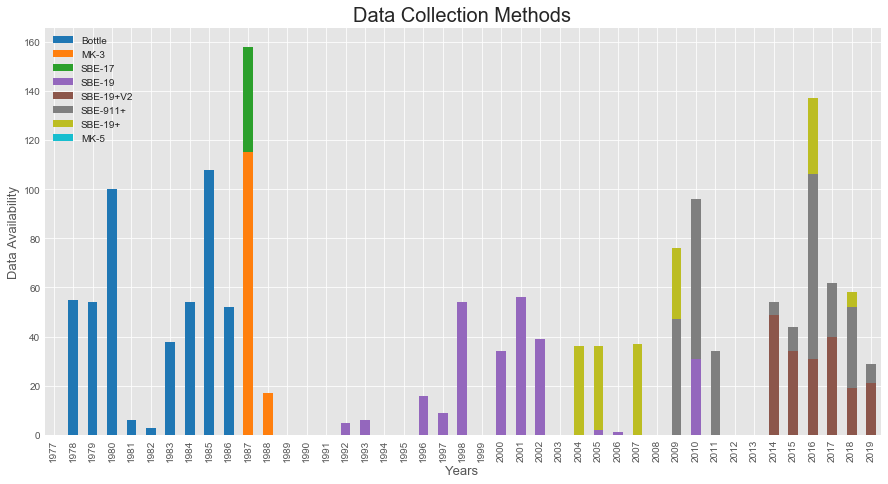

In [382]:
plt.style.use('ggplot')
ax = df.plot(kind="bar", stacked=True, cmap = 'tab10')
plt.gcf().set_size_inches(15, 7.5)
plt.title('Data Collection Methods', fontsize = 20)
plt.xlabel('Years',fontsize=13); plt.ylabel('Data Availability',fontsize=13)
plt.show()

In [371]:
print(Bottles)
print(len(Bottles))

[0, 0, 33, 52, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
43


### Find mixed level depth using 0.2°C change as threshold (regional areas)

In [334]:
for year in range(2004,2005):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []
        
    for i in range(1177,len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
        if yd > 243 and yd <= 273:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
#             print(month_df['p'].iloc[ii])
#             print(month_df['t'].iloc[ii])
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
#             print(pt_df)
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
#             print('day:',month_df['day'].iloc[ii], '---', 'lon:',month_df['lon'].iloc[ii], '---','lat:',month_df['lat'].iloc[ii])
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
#             print('surfacetemp avg of top 5m:', surfacevalmean)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []
            allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
#                     print('temperature at depth:     ',b)
#                     print('depth:                    ',dffin.at[i,'pressure'])
                    if dffin.at[i,'pressure'] >= floordepth - 6:
#                         print('ALL MIXED')
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
#                         print('----------------------------------------------')
#                     elif dffin.at[i,'pressure'] == df_final[0].iloc[-1]:
#                         print('INCONCLUSIVE')
#                         print('----------------------------------------------')
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
#                         if len(pnew) > 0:
#                             yplottable = pnew[0]*-1

#                         plt.style.use('seaborn-white')  
#                         plt.plot(df_final[1],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
#                         plt.xlabel('Temperature (°C)')
#                         plt.ylabel('Pressure (m)')
#                         plt.grid(False)
#                         plt.show()
#                         print('----------------------------------------------')
                    break  
    print(year, '-----',seasonyeartemp)
    print(year, '-----',seasonyeardepth)
    if len(seasonyeartemp) > 0:
#         print('temp_',year,statistics.mean(seasonyeartemp))
        print('depth_',year,np.mean(seasonyeardepth))

2004 ----- [24.63, 24.58, 24.26, 24.27, 23.76, 23.31, 23.32, 22.97, 24.1, 23.48, 24.09, 23.51, 23.57, 23.24, 23.98, 23.07, 22.85, 23.06, 22.67, 22.62, 22.52, 22.77, 22.72, 22.6, 22.88, 22.63, 20.97, 19.63, 19.07, 20.3, 18.52, 18.63, 19.98, 21.41, 21.13, 21.29, 20.78, 20.89, 20.62, 19.79, 18.87, 19.83, 20.88, 19.71, 19.93, 20.34, 21.04, 21.41, 21.2, 21.01, 21.04, 21.08, 19.58, 19.93, 19.73, 20.35, 21.12, 21.0, 20.86]
2004 ----- [7.0, 5.0, 4.0, 7.0, 18.0, 9.0, 10.0, 15.0, 8.0, 13.0, 8.0, 13.0, 18.0, 9.0, 12.0, 17.0, 12.0, 8.0, 9.0, 19.0, 16.0, 15.0, 13.0, 16.0, 27.0, 30.0, 23.0, 16.0, 7.0, 22.0, 9.0, 13.0, 18.0, 17.0, 25.0, 20.0, 19.0, 18.0, 18.0, 7.0, 18.0, 10.0, 21.0, 9.0, 18.0, 17.0, 19.0, 7.0, 7.0, 9.0, 9.0, 9.0, 19.0, 15.0, 22.0, 15.0, 7.0, 7.0, 6.0]
depth_ 2004 13.796610169491526


In [335]:
# Problematic Files (2004, September, Polygon_V)
sept2004vtemp = [22.46, 22.66, 23.17, 23.11, 23.11, 23.08, 23.12, 23.85, 23.96, 24.26, 23.89, 23.8, 24.1, 23.86, 26.44, 23.54, 23.42,24.63, 24.58, 24.26, 24.27, 23.76, 23.31, 23.32, 22.97, 24.1, 23.48, 24.09, 23.51, 23.57, 23.24, 23.98, 23.07, 22.85, 23.06, 22.67, 22.62, 22.52, 22.77, 22.72, 22.6, 22.88, 22.63, 20.97, 19.63, 19.07, 20.3, 18.52, 18.63, 19.98, 21.41, 21.13, 21.29, 20.78, 20.89, 20.62, 19.79, 18.87, 19.83, 20.88, 19.71, 19.93, 20.34, 21.04, 21.41, 21.2, 21.01, 21.04, 21.08, 19.58, 19.93, 19.73, 20.35, 21.12, 21.0, 20.86]
sept2004vdepth = [8.0, 6.0, 20.0, 13.0, 11.0, 13.0, 13.0, 9.0, 11.0, 10.0, 11.0, 12.0, 15.0, 12.0, 19.0, 11.0, 9.0,7.0, 5.0, 4.0, 7.0, 18.0, 9.0, 10.0, 15.0, 8.0, 13.0, 8.0, 13.0, 18.0, 9.0, 12.0, 17.0, 12.0, 8.0, 9.0, 19.0, 16.0, 15.0, 13.0, 16.0, 27.0, 30.0, 23.0, 16.0, 7.0, 22.0, 9.0, 13.0, 18.0, 17.0, 25.0, 20.0, 19.0, 18.0, 18.0, 7.0, 18.0, 10.0, 21.0, 9.0, 18.0, 17.0, 19.0, 7.0, 7.0, 9.0, 9.0, 9.0, 19.0, 15.0, 22.0, 15.0, 7.0, 7.0, 6.0]
print(np.mean(sept2004vtemp))
print(np.mean(sept2004vdepth))

22.121184210526312
13.381578947368421


In [305]:
# Problematic Files (2018, April, Polygon_V)
april2018vtemp = [7.162014130620212, 8.594578660465862, 7.119778726708074,6.189697702785176, 6.050461063137273,6.76982798635825, 6.565014653456499, 7.633640055219748, 7.3908834064988165, 7.364924976141828, 7.167779051265072, 7.280645788142558, 10.21180209507212, 10.359934018462425, 9.815005772565017, 9.910097124158225, 10.105067984426615, 8.720332180362222, 7.050572847793375, 6.805210277057804, 6.564022114400395, 6.596882090820267]
april2018vdepth = [11.0, 15.0, 49.0,62.0, 41.0,39.0, 38.0, 23.0, 43.0, 40.0, 53.0, 51.0, 37.0, 32.0, 34.0, 53.0, 64.0, 18.0, 44.0, 46.0, 46.0, 61.0]
print(np.mean(april2018vtemp))
print(np.mean(april2018vdepth))

7.792189668450809
40.90909090909091


In [257]:
# Problematic Files (2004, Feb, Polygon_V)
feb2004vtemp = [4.37, 4.38, 6.06, 7.38, 6.69, 6.64, 8.17, 8.2, 8.63, 7.18, 6.59, 5.31, 8.5, 8.3, 7.74, 10.03, 7.66, 6.34, 6.33, 6.16, 9.96, 8.9, 7.35, 7.32, 7.71, 8.32, 9.48, 7.5, 7.31, 7.46, 6.91, 5.84, 5.72, 4.9, 5.74, 5.11, 6.03, 5.33, 5.12, 3.79, 3.71, 4.86, 3.71, 3.71, 4.13, 3.68, 4.1, 4.1, 4.14, 4.12, 4.52, 5.08, 4.73, 4.35, 4.54, 4.51, 4.45, 5.02, 5.08, 5.26, 5.02, 5.45, 5.64, 5.65, 5.04, 4.74, 4.87, 4.68, 4.61, 4.71, 4.91, 3.84, 5.0, 5.21, 6.64, 4.46, 8.59, 7.71, 4.45, 5.21, 5.14, 18.43, 21.01, 21.96, 22.13, 17.36, 16.58, 16.64, 15.28, 15.32, 14.67, 22.26, 21.47, 22.12, 23.7, 24.03, 24.38, 23.77, 23.89, 23.92, 24.13, 23.92, 24.52, 24.69, 25.04, 24.91, 25.05, 24.94, 24.82, 24.74, 24.83, 24.75, 24.69, 24.62, 24.48, 24.38, 24.24, 24.26, 24.13, 24.03, 24.17, 23.69, 23.66, 22.98, 23.14, 22.64, 22.09, 22.86, 22.62, 22.08, 22.52, 22.42, 22.19, 22.12, 21.8, 22.37, 22.28, 22.37, 22.4, 22.35, 20.83, 20.13, 19.13, 21.17, 22.41, 22.83, 23.13, 24.45, 24.51, 24.44, 23.92, 23.18, 23.54, 23.22, 23.32, 23.9, 24.58, 24.36, 24.57, 24.59, 24.68, 24.29, 24.21, 24.0, 23.61, 23.62, 23.33, 22.72, 23.34, 23.03, 22.0, 21.92, 19.64, 22.55, 22.47, 22.86, 22.36, 22.46, 22.66, 23.17, 23.11, 23.11, 23.08, 23.12, 23.85, 23.96, 24.26, 23.89, 23.8, 24.1, 23.86, 26.44, 23.54, 23.42, 24.63, 24.58, 24.26, 24.27, 23.76, 23.31, 23.32, 22.97, 24.1, 23.48, 24.09, 23.51, 23.57, 23.24, 23.98, 23.07, 22.85, 23.06, 22.67, 22.62, 22.52, 22.77, 22.72, 22.6, 22.88, 22.63, 20.97, 19.63, 19.07, 20.3, 18.52, 18.63, 19.98, 21.41, 21.13, 21.29, 20.78, 20.89, 20.62, 19.79, 18.87, 19.83, 20.88, 19.71, 19.93, 20.34, 21.04, 21.41, 21.2, 21.01, 21.04, 21.08, 19.58, 19.93, 19.73, 20.35, 21.12, 21.0, 20.86, 13.52, 14.25, 14.47, 14.67, 14.49, 14.69, 19.45, 14.54, 14.67, 15.16, 15.17, 14.82, 15.1, 19.62, 15.75, 16.6, 16.65, 15.81, 16.39, 16.34, 15.61, 16.21, 17.38, 17.34, 17.5, 17.52, 17.11, 16.72, 15.96, 15.97, 14.78, 14.5, 14.48, 14.72, 14.58, 14.47, 14.46, 14.55, 21.14, 21.19, 21.28, 21.36, 21.55, 21.62, 21.49, 20.99, 20.54, 20.6, 21.23, 22.25, 21.15, 21.46, 21.44, 21.79, 22.44, 22.19, 25.45]
feb2004vdepth = [12.0, 40.0, 20.0, 106.0, 8.0, 56.0, 102.0, 371.0, 68.0, 19.0, 23.0, 16.0, 38.0, 50.0, 32.0, 103.0, 61.0, 17.0, 8.0, 32.0, 28.0, 81.0, 6.0, 9.0, 6.0, 68.0, 18.0, 8.0, 6.0, 12.0, 10.0, 8.0, 9.0, 3.0, 13.0, 7.0, 4.0, 21.0, 10.0, 10.0, 13.0, 47.0, 14.0, 9.0, 7.0, 21.0, 15.0, 9.0, 9.0, 21.0, 25.0, 29.0, 34.0, 21.0, 23.0, 10.0, 18.0, 10.0, 19.0, 12.0, 26.0, 11.0, 8.0, 38.0, 33.0, 26.0, 48.0, 53.0, 61.0, 50.0, 35.0, 57.0, 71.0, 33.0, 17.0, 72.0, 120.0, 96.0, 17.0, 23.0, 38.0, 7.0, 6.0, 6.0, 17.0, 7.0, 8.0, 9.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 9.0, 6.0, 7.0, 6.0, 7.0, 6.0, 9.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 10.0, 9.0, 8.0, 8.0, 12.0, 11.0, 10.0, 9.0, 7.0, 10.0, 8.0, 8.0, 9.0, 10.0, 12.0, 6.0, 11.0, 9.0, 10.0, 8.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 8.0, 8.0, 11.0, 9.0, 9.0, 9.0, 9.0, 9.0, 6.0, 11.0, 12.0, 11.0, 20.0, 20.0, 15.0, 6.0, 9.0, 9.0, 7.0, 7.0, 13.0, 10.0, 7.0, 7.0, 14.0, 14.0, 7.0, 16.0, 10.0, 11.0, 11.0, 10.0, 8.0, 10.0, 14.0, 8.0, 6.0, 7.0, 10.0, 12.0, 11.0, 13.0,8.0, 6.0, 20.0, 13.0, 11.0, 13.0, 13.0, 9.0, 11.0, 10.0, 11.0, 12.0, 15.0, 12.0, 19.0, 11.0, 9.0, 7.0, 5.0, 4.0, 7.0, 18.0, 9.0, 10.0, 15.0, 8.0, 13.0, 8.0, 13.0, 18.0, 9.0, 12.0, 17.0, 12.0, 8.0, 9.0, 19.0, 16.0, 15.0, 13.0, 16.0, 27.0, 30.0, 23.0, 16.0, 7.0, 22.0, 9.0, 13.0, 18.0, 17.0, 25.0, 20.0, 19.0, 18.0, 18.0, 7.0, 18.0, 10.0, 21.0, 9.0, 18.0, 17.0, 19.0, 7.0, 7.0, 9.0, 9.0, 9.0, 19.0, 15.0, 22.0, 15.0, 7.0, 7.0, 6.0, 22.0, 50.0, 19.0, 43.0, 57.0, 87.0, 43.0, 12.0, 47.0, 11.0, 9.0, 36.0, 26.0, 63.0, 12.0, 13.0, 13.0, 35.0, 21.0, 27.0, 12.0, 34.0, 14.0, 69.0, 16.0, 6.0, 15.0, 18.0, 10.0, 8.0, 5.0, 14.0, 10.0, 22.0, 17.0, 29.0, 29.0, 26.0, 10.0, 11.0, 8.0, 8.0, 8.0, 8.0, 9.0, 6.0, 7.0, 9.0, 8.0, 8.0, 8.0, 6.0, 6.0, 13.0, 15.0, 10.0, 10.0]
print(np.mean(feb2004vtemp))
print(np.mean(feb2004vdepth))

17.25774193548387
18.967741935483872


In [258]:
# Problematic Files (2018, Feb, Polygon_V)
feb2018vtemp = [6.06857162599257, 6.065960141058815, 5.668966134239737, 5.6345000784929375, 5.360154283200798, 5.633825747175748, 6.236122492638664, 6.376866931511978, 6.047358559910449, 6.135857125142634, 6.365151009948877, 6.424226120150517, 6.547367267682779, 7.284321240503692, 7.274512335504276, 7.1333085941376675, 7.755335082352166, 7.833457273974668, 6.788133313568768, 6.900452385365734, 7.014413158769097, 7.495816362258425, 9.103186064016883, 7.546278930931665, 9.287423954959198, 7.345463468156682, 9.852536893203881, 8.695126660369226, 11.844996349905736, 11.585460124342381, 11.795079120218945, 6.785755755188316, 9.088698180967098, 8.717402600580728, 9.087813432129929, 10.285635854446102, 8.72876627134057, 9.010546979062168, 10.219217233869479, 9.029850429048292, 7.910898543133402, 7.985007208901113, 7.9315355331763415, 8.591837158985296, 5.502953094375397, 5.329710755608607, 5.308160993643236, 5.123304881946786, 5.083559192683697, 5.10943138715926, 5.238806546632756, 5.3244565170999305, 6.107446435054287, 6.278000025506464, 5.920086639357196, 5.789638367583655, 5.934571454856004, 5.76221452517798, 6.321579119947238, 5.76659928731382, 5.5405357931004415, 5.116324512450333, 5.83419715414692, 5.9789085176420915, 5.762975219455999, 6.117033391640858, 6.367147669052916, 5.906518400381328, 6.300863792801453, 6.46106297455462, 6.76982798635825, 6.565014653456499, 7.633640055219748, 7.3908834064988165, 7.364924976141828, 7.167779051265072, 7.280645788142558, 10.21180209507212, 10.359934018462425, 9.815005772565017, 9.910097124158225, 10.105067984426615, 8.720332180362222, 7.050572847793375, 6.805210277057804, 6.564022114400395, 6.596882090820267,6.189697702785176, 6.050461063137273,7.162014130620212, 8.594578660465862, 7.119778726708074, 12.447846755556899, 12.121235555524153, 12.741277443594296, 12.752672742518932, 12.499686371344644, 12.941948646916469, 12.855624855615108, 12.628140499213863, 12.654013074719318, 13.592950060088594, 13.672136681080916, 17.497065124891844, 13.994493950679454, 14.04404771017542, 14.690877878194108, 16.180719127738097, 16.0646768725372, 14.866566632692455, 14.23067754744351, 14.12968987422668, 13.729298384874356, 12.629516397592262, 21.29209741232463, 23.571789096516692, 24.84688459372707, 24.615359666164515, 24.99395216682562, 23.578657022424423, 24.138923559983184, 25.227225779233915, 25.367951928342823, 25.31279648679246, 26.386042513947174, 25.48929856765366, 25.785519085122385, 25.72278734262022, 26.27560194055058, 26.3244487928039, 26.726401840047984, 25.967493531948254, 26.007949986916536, 24.62904796717362, 25.717992169334, 26.562641602862968, 26.559218431183325, 27.35940000166251, 26.615167774315168, 26.937137658978326, 26.83379191300652, 26.673078493440954, 27.055196230079705, 26.661205396796475, 27.495101569683666, 27.683415308881294, 28.101811284491543, 28.305180577549798, 27.153978573146752, 28.04147790510576, 28.44947397436478, 28.074551322713166, 27.479657727140456, 27.86717383954232, 27.882413984579458, 27.633572229043153, 27.979148380262778, 28.217813375175844, 28.567435848634542, 25.606014983262785, 24.011989944370292, 23.722948837905978, 24.079249813363568, 22.940943594805383, 24.309724041113064, 23.294843695210368, 23.222993301926746, 23.150409023107237, 22.407631485837907, 22.418927275480844, 22.461922564564336, 22.92952523755474, 22.552578585916798, 22.588011962362177, 22.213381625361066, 21.517593349054334, 21.928456949178692, 21.710154297350012, 22.44421748095814, 23.01206251394732, 22.80981003221386, 22.263903630833735, 22.2460494061234, 21.83970277822932, 22.246581212388932, 22.382361944700822, 22.33780740579272, 22.50268634062173, 21.899655324221232, 22.258743172539628, 22.30969098169825, 21.78484770642202, 22.224621905160507, 23.925321078116085, 23.95805282705244, 23.912769064882045, 23.835167635669933, 23.819658966201427, 24.343095178819013, 23.941025478604466, 24.103151513134055, 24.11141949380051, 22.094264734991388, 23.56151891195465, 23.50812060592742, 25.16040609704305, 23.45106619156494, 23.104843946464612, 17.19899066954203, 16.92758787490134, 16.864163135529562, 17.327360289057843, 18.993351028732235, 18.444574288094987, 18.621401317415774, 21.0556626143428, 19.299093315312124, 18.972862523591264, 19.031807547141415, 18.104027998309732, 17.765819617026963, 17.926490078283052, 18.538869552509052, 17.322719047478685, 16.791886144500452, 16.34504080161054, 16.846213601404084, 16.126214248094804, 16.09712704096169, 16.46357999665076, 16.16552191886246, 15.424209206528817, 15.400955769314697, 15.116670926994098, 14.855167768925734, 15.173119331684951, 15.596786394887616, 15.868408318829779, 15.387288309755334, 15.244891669512718, 15.343838378955653, 15.837030628327113, 15.485081980949023, 14.940811019138103, 15.391717895421534, 15.003604507371561]
feb2018vdepth = [16.0, 21.0, 15.0, 18.0, 17.0, 28.0, 38.0, 21.0, 21.0, 15.0, 21.0, 10.0, 10.0, 24.0, 33.0, 28.0, 9.0, 32.0, 20.0, 13.0, 14.0, 7.0, 22.0, 12.0, 16.0, 6.0, 42.0, 66.0, 98.0, 94.0, 94.0, 34.0, 16.0, 13.0, 22.0, 45.0, 40.0, 37.0, 48.0, 29.0, 30.0, 29.0, 44.0, 72.0, 6.0, 6.0, 8.0, 53.0, 32.0, 31.0, 20.0, 21.0, 11.0, 13.0, 22.0, 21.0, 21.0, 20.0, 36.0, 12.0, 20.0, 12.0, 8.0, 30.0, 18.0, 6.0, 9.0, 9.0, 6.0, 6.0, 39.0, 38.0, 23.0, 43.0, 40.0, 53.0, 51.0, 37.0, 32.0, 34.0, 53.0, 64.0, 18.0, 44.0, 46.0, 46.0, 61.0,62.0, 41.0,11.0, 15.0, 49.0, 9.0, 8.0, 9.0, 6.0, 12.0, 8.0, 6.0, 7.0, 7.0, 6.0, 10.0, 8.0, 218.0, 11.0, 6.0, 8.0, 7.0, 6.0, 12.0, 8.0, 10.0, 18.0, 10.0, 10.0, 6.0, 9.0, 6.0, 6.0, 6.0, 7.0, 8.0, 6.0, 6.0, 6.0, 8.0, 7.0, 9.0, 7.0, 6.0, 7.0, 9.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 7.0, 9.0, 6.0, 8.0, 6.0, 9.0, 6.0, 6.0, 8.0, 6.0, 7.0, 6.0, 8.0, 13.0, 8.0, 9.0, 10.0, 6.0, 8.0, 6.0, 16.0, 8.0, 7.0, 8.0, 11.0, 9.0, 7.0, 8.0, 14.0, 16.0, 16.0, 12.0, 16.0, 20.0, 19.0, 16.0, 18.0, 24.0, 17.0, 20.0, 14.0, 15.0, 16.0, 16.0, 20.0, 20.0, 10.0, 19.0, 8.0, 6.0, 6.0, 8.0, 16.0, 18.0, 12.0, 15.0, 23.0, 17.0, 8.0, 6.0, 18.0, 7.0, 7.0, 6.0, 20.0, 12.0, 11.0, 23.0, 18.0, 19.0, 17.0, 17.0, 9.0, 9.0, 21.0, 19.0, 18.0, 29.0, 39.0, 18.0, 11.0, 30.0, 40.0, 9.0, 63.0, 46.0, 49.0, 39.0, 37.0, 30.0, 26.0, 27.0, 35.0, 44.0, 68.0, 54.0, 40.0, 29.0, 32.0, 29.0, 34.0, 39.0, 30.0, 20.0, 13.0, 19.0, 26.0]
print(np.mean(feb2018vtemp))
print(np.mean(feb2018vdepth))

15.943413623128754
21.296747967479675


In [ ]:
# Summer 1977 to 2020 MLD. Polygon_v is Southern MAB
depth_1977 = statistics.mean([])
depth_1978 = statistics.mean([5.481481481481482])
depth_1979 = statistics.mean([4.590909090909091,for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
        if yd > 181 and yd <= 212:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
#             print(month_df['p'].iloc[ii])
#             print(month_df['t'].iloc[ii])
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
#             print(pt_df)
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
#             print('day:',month_df['day'].iloc[ii], '---', 'lon:',month_df['lon'].iloc[ii], '---','lat:',month_df['lat'].iloc[ii])
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
#             print('surfacetemp avg of top 5m:', surfacevalmean)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []
            allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
#                     print('temperature at depth:     ',b)
#                     print('depth:                    ',dffin.at[i,'pressure'])
                    if dffin.at[i,'pressure'] >= floordepth - 6:
#                         print('ALL MIXED')
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
#                         print('----------------------------------------------')
#                     elif dffin.at[i,'pressure'] == df_final[0].iloc[-1]:
#                         print('INCONCLUSIVE')
#                         print('----------------------------------------------')
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
#                         if len(pnew) > 0:
#                             yplottable = pnew[0]*-1

#                         plt.style.use('seaborn-white')  
#                         plt.plot(df_final[1],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
#                         plt.xlabel('Temperature (°C)')
#                         plt.ylabel('Pressure (m)')
#                         plt.grid(False)
#                         plt.show()
#                         print('----------------------------------------------')
                    break  
#     print(year, '-----',seasonyeartemp)
#     print(year, '-----',seasonyeardepth)
    if len(seasonyeartemp) > 0:
#         print('temp_',year,statistics.mean(seasonyeartemp))
        print('depth_',year,np.mean(seasonyeardepth))])



In [337]:
for year in range(2005,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
        if yd > 304 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_v.contains(point) == True:
#             print(month_df['p'].iloc[ii])
#             print(month_df['t'].iloc[ii])
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
#             print(pt_df)
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
#             print('day:',month_df['day'].iloc[ii], '---', 'lon:',month_df['lon'].iloc[ii], '---','lat:',month_df['lat'].iloc[ii])
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
#             print('surfacetemp avg of top 5m:', surfacevalmean)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []
            allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
#                     print('temperature at depth:     ',b)
#                     print('depth:                    ',dffin.at[i,'pressure'])
                    if dffin.at[i,'pressure'] >= floordepth - 6:
#                         print('ALL MIXED')
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
#                         print('----------------------------------------------')
#                     elif dffin.at[i,'pressure'] == df_final[0].iloc[-1]:
#                         print('INCONCLUSIVE')
#                         print('----------------------------------------------')
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
#                         if len(pnew) > 0:
#                             yplottable = pnew[0]*-1

#                         plt.style.use('seaborn-white')  
#                         plt.plot(df_final[1],df_final[0]*-1,color='blue')
#                         plt.axhline(y=yplottable, color='r', linestyle='--')
#                         plt.xlabel('Temperature (°C)')
#                         plt.ylabel('Pressure (m)')
#                         plt.grid(False)
#                         plt.show()
#                         print('----------------------------------------------')
                    break  
#     print(year, '-----',seasonyeartemp)
#     print(year, '-----',seasonyeardepth)
    if len(seasonyeartemp) > 0:
#         print('temp_',year,statistics.mean(seasonyeartemp))
        print('depth_',year,np.mean(seasonyeardepth))

depth_ 2005 29.389830508474578
depth_ 2006 43.8235294117647
depth_ 2007 20.379310344827587
depth_ 2008 33.294117647058826
depth_ 2009 39.0625
depth_ 2010 33.51282051282051
depth_ 2011 29.15
depth_ 2012 35.853658536585364
depth_ 2013 31.59090909090909
depth_ 2014 36.02272727272727
depth_ 2017 25.545454545454547
depth_ 2018 29.842105263157894


In [338]:
# Fall 1977 to 2020 MLD. Polygon_v is Southern MAB
# depth_1977 = statistics.mean([])
# depth_1978 = statistics.mean([])
# depth_1979 = statistics.mean([])

depth_1980 = statistics.mean([12.961538461538462])
# depth_1981 = statistics.mean([])
# depth_1982 = statistics.mean([])
# depth_1983 = statistics.mean([])
# depth_1984 = statistics.mean([])
depth_1985 = statistics.mean([8.976190476190476])
depth_1986 = statistics.mean([11.766666666666667])
# depth_1987 = statistics.mean([])
# depth_1988 = statistics.mean([])
# depth_1989 = statistics.mean([])

# depth_1990 = statistics.mean([])
depth_1991 = statistics.mean([12.921052631578947])
depth_1992 = statistics.mean([14.076923076923077])
depth_1993 = statistics.mean([11.686567164179104])
depth_1994 = statistics.mean([14.76923076923077])
depth_1995 = statistics.mean([17.84375])
depth_1996 = statistics.mean([12.8125])
depth_1997 = statistics.mean([13.569620253164556])
depth_1998 = statistics.mean([13.61111111111111])
depth_1999 = statistics.mean([19.397058823529413])

depth_2000 = statistics.mean([14.78688524590164])
depth_2001 = statistics.mean([13.707317073170731])
depth_2002 = statistics.mean([12.666666666666666])
depth_2003 = statistics.mean([11.88888888888889])
depth_2004 = statistics.mean([13.381578947368421])
depth_2005 = statistics.mean([13.727272727272727,29.389830508474578])
depth_2006 = statistics.mean([16.170731707317074,43.8235294117647])
depth_2007 = statistics.mean([16.088607594936708,25.583333333333332,20.379310344827587])
depth_2008 = statistics.mean([12.053333333333333,35.0,33.294117647058826])
depth_2009 = statistics.mean([17.10810810810811,33.1,39.0625])

depth_2010 = statistics.mean([16.51685393258427,25.0,33.51282051282051])
depth_2011 = statistics.mean([20.691176470588236,29.15])
depth_2012 = statistics.mean([14.686868686868687,35.853658536585364])
depth_2013 = statistics.mean([14.88888888888889,31.59090909090909])
depth_2014 = statistics.mean([19.65686274509804,36.02272727272727])
depth_2015 = statistics.mean([13.5,27.413793103448278])
depth_2016 = statistics.mean([14.784810126582279,22.0])
depth_2017 = statistics.mean([25.545454545454547])
depth_2018 = statistics.mean([11.76388888888889,29.842105263157894])
depth_2019 = statistics.mean([16.17241379310345,31.86842105263158])

best fit line:
y = -869.24 + 0.44x


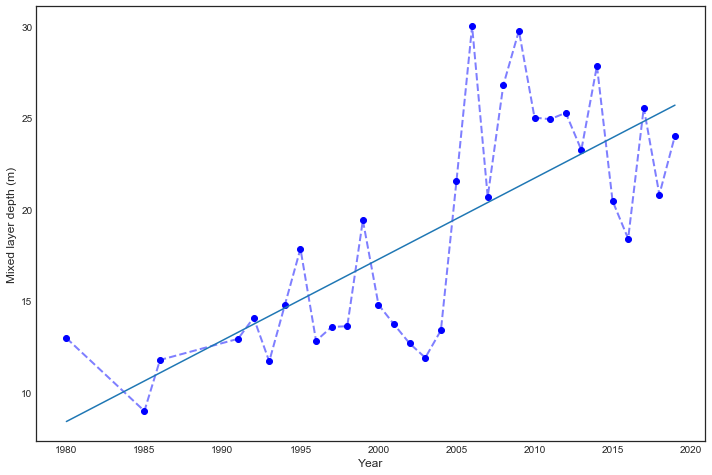

In [341]:
x = [1980, 1985, 1986, 
     1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1980,depth_1985,depth_1986,
    depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004, depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]

plt.figure(figsize=(12, 8))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Winter (DJF) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
# plt.grid(True)
plt.savefig('timeseries_fallMLD_SouthernMAB')
plt.show()

In [327]:
# Summer 1977 to 2020 MLD. Polygon_v is Southern MAB
depth_1977 = statistics.mean([3.877551020408163])
depth_1978 = statistics.mean([5.481481481481482,5.423076923076923])
depth_1979 = statistics.mean([4.590909090909091,5.59375,8.490196078431373])

depth_1980 = statistics.mean([7.428571428571429,7.261904761904762])
depth_1981 = statistics.mean([6.137931034482759])
depth_1982 = statistics.mean([7.583333333333333])
depth_1983 = statistics.mean([12.0])
# depth_1984 = statistics.mean([])
depth_1985 = statistics.mean([9.666666666666666])
depth_1986 = statistics.mean([11.904761904761905])
depth_1987 = statistics.mean([9.646153846153846])
# depth_1988 = statistics.mean([])
depth_1989 = statistics.mean([7.84,10.461538461538462])

# depth_1990 = statistics.mean([])
depth_1991 = statistics.mean([10.0,7.0,9.173913043478262])
depth_1992 = statistics.mean([9.0,8.931818181818182])
depth_1993 = statistics.mean([9.673913043478262])
depth_1994 = statistics.mean([9.0,8.5,10.235294117647058])
depth_1995 = statistics.mean([8.428571428571429,12.0])
depth_1996 = statistics.mean([6.0,8.298076923076923])
depth_1997 = statistics.mean([10.666666666666666,9.525925925925925])
depth_1998 = statistics.mean([8.0,8.290322580645162])
depth_1999 = statistics.mean([9.652173913043478])

depth_2000 = statistics.mean([9.628571428571428])
depth_2001 = statistics.mean([6.166666666666667,7.848484848484849])
depth_2002 = statistics.mean([10.6,11.542857142857143])
depth_2003 = statistics.mean([7.0,7.363636363636363])
depth_2004 = statistics.mean([8.333333333333334,10.07843137254902])
depth_2005 = statistics.mean([6.5,7.333333333333333])
depth_2006 = statistics.mean([10.473684210526315,8.029411764705882,10.357142857142858])
depth_2007 = statistics.mean([8.35593220338983,12.18421052631579])
depth_2008 = statistics.mean([7.074074074074074,8.444444444444445,13.666666666666666])
depth_2009 = statistics.mean([8.61111111111111,9.016129032258064])

# depth_2010 = statistics.mean([])
depth_2011 = statistics.mean([10.382352941176471,8.304347826086957])
depth_2012 = statistics.mean([8.733333333333333,10.17142857142857])
depth_2013 = statistics.mean([9.616666666666667,8.26086956521739,7.785714285714286])
depth_2014 = statistics.mean([6.5])
depth_2015 = statistics.mean([8.705882352941176])
depth_2016 = statistics.mean([7.444444444444445,9.088235294117647])
depth_2017 = statistics.mean([7.666666666666667])
depth_2018 = statistics.mean([10.0,7.190476190476191])
depth_2019 = statistics.mean([9.222222222222221])

best fit line:
y = -43.74 + 0.03x


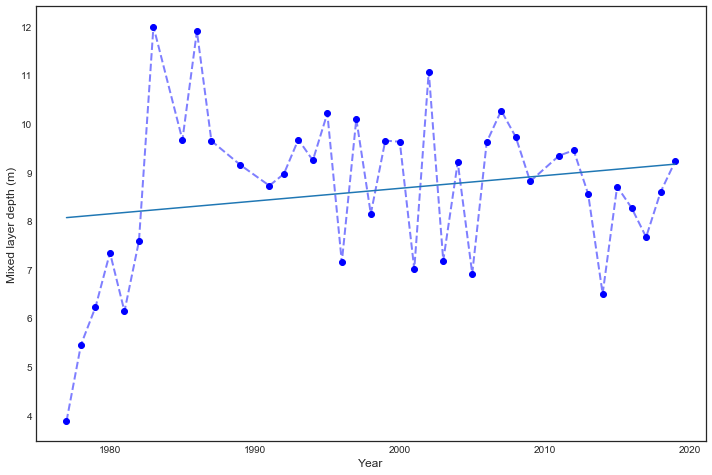

In [330]:
x = [1977, 1978, 1979, 1980, 1981, 1982, 1983, 1985, 1986, 1987, 
     1989, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,depth_1985,depth_1986,depth_1987,
    depth_1989,depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004, depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]

plt.figure(figsize=(12, 8))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Summer (JJA) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
# plt.grid(True)
plt.savefig('timeseries_summerMLD_SouthernMAB')
plt.show()

In [392]:
# Spring 1977 to 2020 MLD. Polygon_v is Southern MAB
# depth_1977 = statistics.mean([])
depth_1978 = statistics.mean([17.023809523809526,18.142857142857142])
depth_1979 = statistics.mean([21.28,10.585365853658537])

depth_1980 = statistics.mean([39.9,13.326923076923077,6.115384615384615])
depth_1981 = statistics.mean([28.691358024691358,10.666666666666666])
depth_1982 = statistics.mean([19.068181818181817,5.0])
depth_1983 = statistics.mean([7.3125])
depth_1984 = statistics.mean([10.6875])
depth_1985 = statistics.mean([15.857142857142858,13.254901960784315])
depth_1986 = statistics.mean([16.22222222222222])
depth_1987 = statistics.mean([12.127450980392156])
depth_1988 = statistics.mean([7.0])
# depth_1989 = statistics.mean([])

# depth_1990 = statistics.mean([])
depth_1991 = statistics.mean([28.58823529411765])
depth_1992 = statistics.mean([28.49206349206349,26.0])
depth_1993 = statistics.mean([29.31081081081081,36.8])
depth_1994 = statistics.mean([28.885057471264368])
depth_1995 = statistics.mean([37.214285714285715])
depth_1996 = statistics.mean([23.617977528089888,36.06666666666667])
depth_1997 = statistics.mean([25.78787878787879,8.444444444444445])
depth_1998 = statistics.mean([34.62921348314607,7.769230769230769])
depth_1999 = statistics.mean([29.714285714285715])

depth_2000 = statistics.mean([29.876712328767123,18.823529411764707])
depth_2001 = statistics.mean([33.66216216216216,15.742857142857142])
depth_2002 = statistics.mean([38.75555555555555,13.642857142857142])
depth_2003 = statistics.mean([31.970149253731343])
depth_2004 = statistics.mean([34.79012345679013,8.1])
depth_2005 = statistics.mean([31.725490196078432,21.612903225806452])
depth_2006 = statistics.mean([24.146341463414632,21.0])
depth_2007 = statistics.mean([43.54782608695652,59.44444444444444])
depth_2008 = statistics.mean([34.235955056179776])
depth_2009 = statistics.mean([38.947916666666664,9.044444444444444])

depth_2010 = statistics.mean([32.32258064516129,10.712121212121213])
depth_2011 = statistics.mean([37.95061728395062,11.555555555555555])
depth_2012 = statistics.mean([50.605633802816904])
depth_2013 = statistics.mean([30.49])
depth_2014 = statistics.mean([58.58904109589041,55.26923076923077])
depth_2015 = statistics.mean([25.858695652173914,10.216216216216216])
depth_2016 = statistics.mean([40.68539325842696,21.296296296296298])
depth_2017 = statistics.mean([35.3974358974359,50.4375,13.785714285714286])
depth_2018 = statistics.mean([25.67142857142857,40.90909090909091,18.181818181818183])
depth_2019 = statistics.mean([34.93617021276596,27.56])

In [319]:
# Winter 1977 to 2020 MLD. Polygon_v is Southern MAB
depth_1977 = statistics.mean([12.565217391304348])
depth_1978 = statistics.mean([15.583941605839415])
depth_1979 = statistics.mean([12.0,20.0])

depth_1980 = statistics.mean([19.77304964539007,49.166666666666664])
depth_1981 = statistics.mean([22.120689655172413])
depth_1982 = statistics.mean([24.86315789473684,38.432432432432435])
depth_1983 = statistics.mean([22.273684210526316,77.8])
depth_1984 = statistics.mean([17.757575757575758])
# depth_1985 = statistics.mean([196.0, 16.10994764397906]) # Real
depth_1985 = statistics.mean([16.10994764397906]) # Take away anomaly
depth_1986 = statistics.mean([35.82692307692308, 17.906040268456376])
depth_1987 = statistics.mean([27.566037735849058, 15.392344497607656])
depth_1988 = statistics.mean([30.96078431372549, 13.586206896551724])
depth_1989 = statistics.mean([9.733333333333333])

depth_1990 = statistics.mean([27.833333333333332])
depth_1991 = statistics.mean([19.321052631578947])
depth_1992 = statistics.mean([18.08139534883721])
depth_1993 = statistics.mean([34.833333333333336, 18.651041666666668])
depth_1994 = statistics.mean([17.86234817813765])
depth_1995 = statistics.mean([22.366412213740457])
depth_1996 = statistics.mean([15.698961937716263])
depth_1997 = statistics.mean([15.301492537313433])
depth_1998 = statistics.mean([22.292])
depth_1999 = statistics.mean([22.87866108786611])

depth_2000 = statistics.mean([22.142201834862384])
depth_2001 = statistics.mean([46.07142857142857, 21.348314606741575])
depth_2002 = statistics.mean([23.871287128712872])
depth_2003 = statistics.mean([20.90340909090909])
depth_2004 = statistics.mean([18.967741935483872])
depth_2005 = statistics.mean([29.625,24.182142857142857])
depth_2006 = statistics.mean([94.25,18.380228136882128])
depth_2007 = statistics.mean([42.5,25.419354838709676])
depth_2008 = statistics.mean([38.04545454545455,19.59105431309904])
depth_2009 = statistics.mean([57.2972972972973,23.60339943342776])

depth_2010 = statistics.mean([24.13422818791946])
depth_2011 = statistics.mean([97.06666666666666,23.82051282051282])
depth_2012 = statistics.mean([83.65217391304348,25.85144927536232])
depth_2013 = statistics.mean([19.163522012578618])
depth_2014 = statistics.mean([39.391941391941394])
depth_2015 = statistics.mean([18.58555133079848])
depth_2016 = statistics.mean([24.10878661087866])
depth_2017 = statistics.mean([31.308823529411764])
depth_2018 = statistics.mean([21.296747967479675])
depth_2019 = statistics.mean([25.790076335877863])

In [393]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

best fit line:
y = -1107.65 + 0.57x


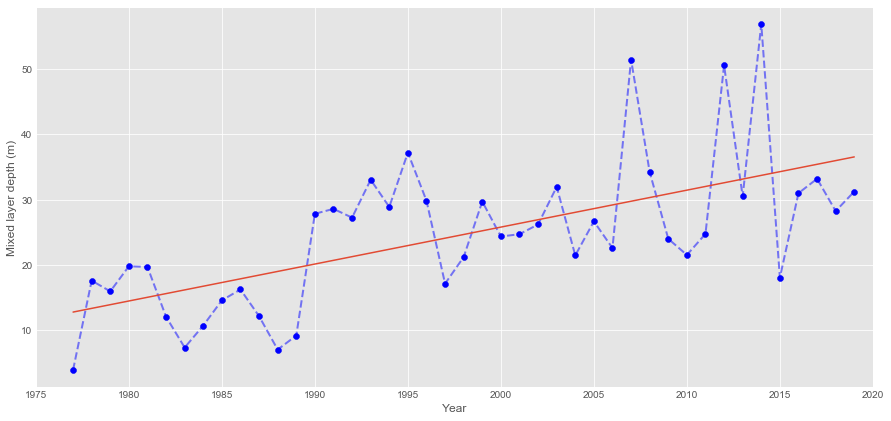

In [418]:
x = [1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,depth_1984,depth_1985,depth_1986,depth_1987,
    depth_1988,depth_1989,depth_1990,depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004, depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]

plt.figure(figsize=(15, 7))

plt.xlim((1975,2020))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Winter (DJF) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
# plt.grid(True)
# plt.savefig('timeseries_winterMLD_SouthernMAB')
plt.show()

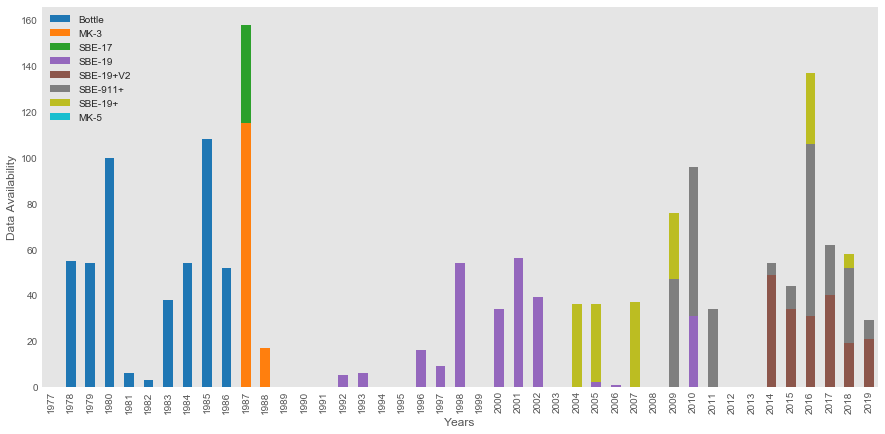

In [412]:
plt.style.use('ggplot')
ax = df.plot(kind="bar", stacked=True, cmap = 'tab10')
plt.gcf().set_size_inches(15, 7)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xlabel('Years',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
grid()
plt.show()

best fit line:
y = -1030.91 + 0.53x


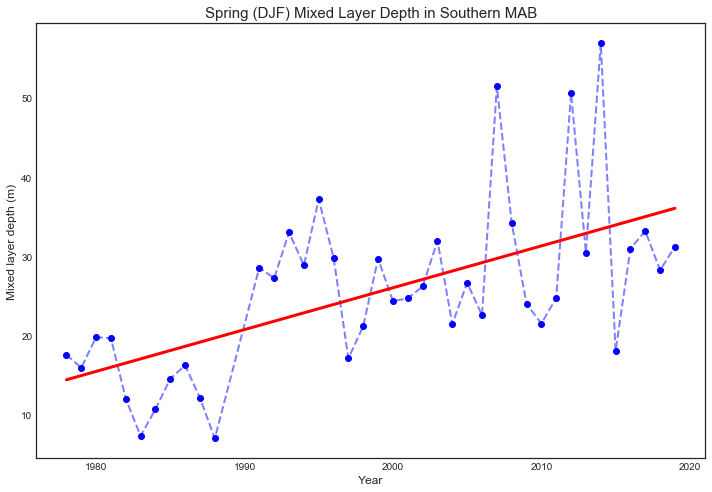

In [315]:
x = [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,depth_1984,depth_1985,depth_1986,depth_1987,
    depth_1988,depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004, depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]

plt.figure(figsize=(12, 8))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.title('Spring (DJF) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
# plt.grid(True)
plt.savefig('timeseries_springMLD_SouthernMAB')
plt.show()

In [200]:
# Polygon_v is Southern MAB
temp2009_jan = [9.51, 9.56, 9.5, 9.86, 13.8, 14.18, 13.96, 14.0, 13.97, 11.48, 8.72, 9.5, 8.85, 8.63, 10.06, 9.42, 12.24, 12.28, 10.23, 8.05, 5.11, 4.63, 8.81, 7.81, 4.43, 5.28, 8.91, 13.22, 14.85, 6.46, 8.83, 11.27, 11.13]
depth2009_jan = [43.0, 41.0, 42.0, 41.0, 86.0, 27.0, 39.0, 50.0, 77.0, 14.0, 13.0, 55.0, 12.0, 39.0, 54.0, 9.0, 142.0, 153.0, 231.0, 298.0, 15.0, 10.0, 56.0, 11.0, 18.0, 16.0, 66.0, 152.0, 37.0, 45.0, 47.0, 32.0, 39.0]
mean_temp2009jan = statistics.mean(temp2009_jan)
mean_depth2009jan = statistics.mean(depth2009_jan)
print(mean_temp2009jan)
print(mean_depth2009jan)

9.955757575757575
60.90909090909091


day: 15 --- lon: 73.0067 --- lat: 39.89
floor depth:               50
surfacetemp avg of top 5m: 9.391666666666667
temperature at depth:      9.51
depth:                     43.0


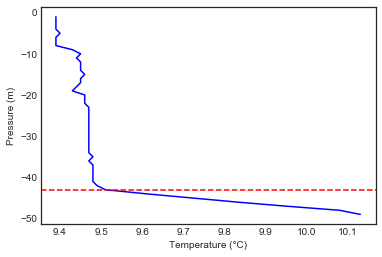

----------------------------------------------
day: 15 --- lon: 73.0067 --- lat: 39.8883
floor depth:               50
surfacetemp avg of top 5m: 9.42
temperature at depth:      9.56
depth:                     41.0


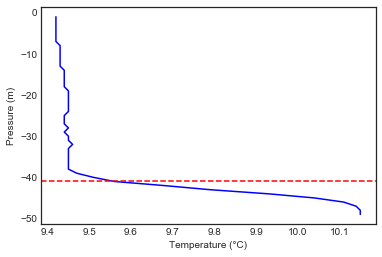

----------------------------------------------
day: 15 --- lon: 73.0067 --- lat: 39.8883
floor depth:               51
surfacetemp avg of top 5m: 9.381666666666668
temperature at depth:      9.5
depth:                     42.0


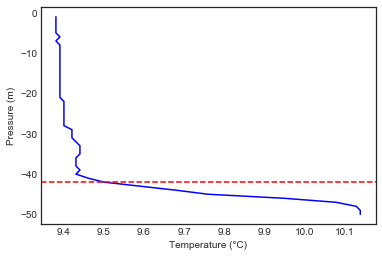

----------------------------------------------
day: 16 --- lon: 73.8833 --- lat: 39.0733
floor depth:               30
surfacetemp avg of top 5m: 7.256666666666667
temperature at depth:      7.27
depth:                     29.0
ALL MIXED
----------------------------------------------
day: 16 --- lon: 74.55 --- lat: 38.1833
floor depth:               36
surfacetemp avg of top 5m: 8.518333333333333
temperature at depth:      8.55
depth:                     33.0
ALL MIXED
----------------------------------------------
day: 17 --- lon: 75.2783 --- lat: 37.03
floor depth:               33
surfacetemp avg of top 5m: 8.233333333333334
temperature at depth:      8.24
depth:                     27.0
ALL MIXED
----------------------------------------------
day: 17 --- lon: 75.0433 --- lat: 37.0283
floor depth:               44
surfacetemp avg of top 5m: 9.826666666666666
temperature at depth:      9.86
depth:                     41.0
ALL MIXED
----------------------------------------------
day: 

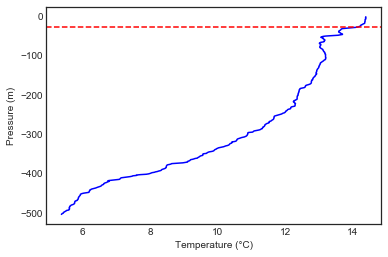

----------------------------------------------
day: 18 --- lon: 74.6217 --- lat: 36.8767
floor depth:               418
surfacetemp avg of top 5m: 14.16
temperature at depth:      13.96
depth:                     39.0


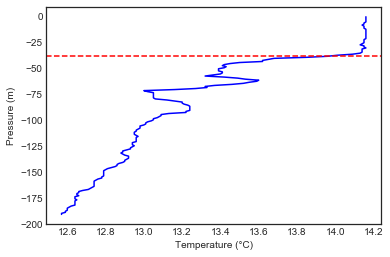

----------------------------------------------
day: 18 --- lon: 74.875 --- lat: 36.0617
floor depth:               87
surfacetemp avg of top 5m: 13.96
temperature at depth:      14.0
depth:                     50.0
INCONCLUSIVE
----------------------------------------------
day: 18 --- lon: 74.8767 --- lat: 36.06
floor depth:               86
surfacetemp avg of top 5m: 13.956666666666667
temperature at depth:      13.97
depth:                     77.0
INCONCLUSIVE
----------------------------------------------
day: 18 --- lon: 75.0133 --- lat: 36.0583
floor depth:               44
surfacetemp avg of top 5m: 11.286666666666665
temperature at depth:      11.48
depth:                     14.0


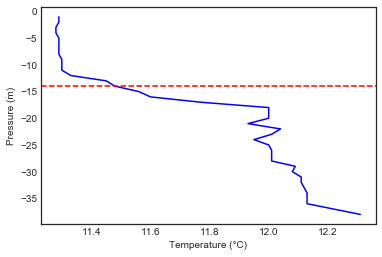

----------------------------------------------
day: 19 --- lon: 75.2767 --- lat: 36.0583
floor depth:               34
surfacetemp avg of top 5m: 8.53
temperature at depth:      8.72
depth:                     13.0


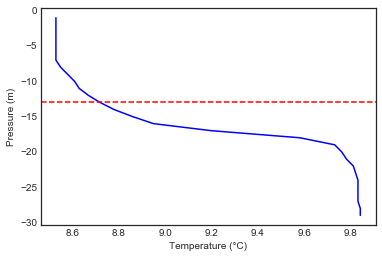

----------------------------------------------
day: 19 --- lon: 74.2167 --- lat: 38.1867
floor depth:               60
surfacetemp avg of top 5m: 9.45
temperature at depth:      9.5
depth:                     55.0
ALL MIXED
----------------------------------------------
day: 19 --- lon: 74.0533 --- lat: 38.1817
floor depth:               70
surfacetemp avg of top 5m: 8.661666666666667
temperature at depth:      8.85
depth:                     12.0


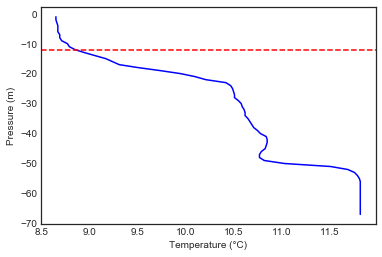

----------------------------------------------
day: 20 --- lon: 73.3467 --- lat: 39.0817
floor depth:               59
surfacetemp avg of top 5m: 8.458333333333334
temperature at depth:      8.63
depth:                     39.0


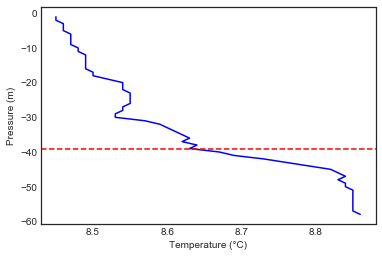

----------------------------------------------
day: 20 --- lon: 72.9017 --- lat: 39.0883
floor depth:               85
surfacetemp avg of top 5m: 9.861666666666666
temperature at depth:      10.06
depth:                     54.0


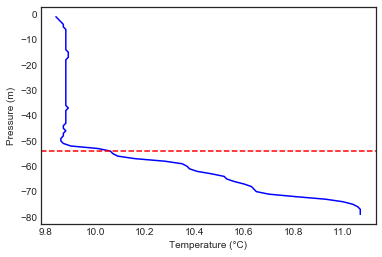

----------------------------------------------
day: 20 --- lon: 72.4033 --- lat: 39.4333
floor depth:               128
surfacetemp avg of top 5m: 9.223333333333333
temperature at depth:      9.42
depth:                     9.0


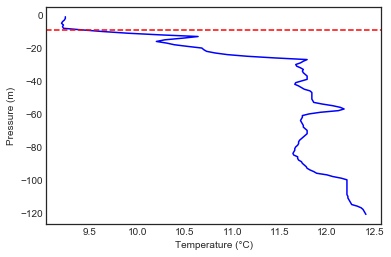

----------------------------------------------
day: 20 --- lon: 72.33 --- lat: 39.3967
floor depth:               148
surfacetemp avg of top 5m: 12.183333333333334
temperature at depth:      12.24
depth:                     142.0
ALL MIXED
----------------------------------------------
day: 20 --- lon: 72.3317 --- lat: 39.3533
floor depth:               163
surfacetemp avg of top 5m: 12.462
temperature at depth:      12.28
depth:                     153.0


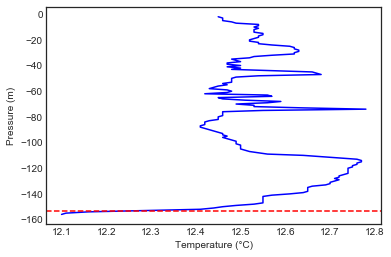

----------------------------------------------
day: 21 --- lon: 72.2383 --- lat: 39.3683
floor depth:               285
surfacetemp avg of top 5m: 10.346
temperature at depth:      10.23
depth:                     231.0


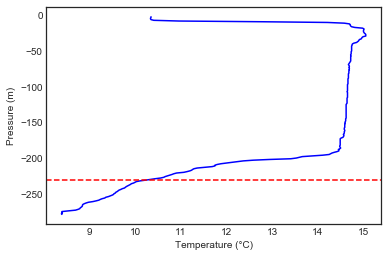

----------------------------------------------
day: 21 --- lon: 72.1517 --- lat: 39.4783
floor depth:               488
surfacetemp avg of top 5m: 8.24
temperature at depth:      8.05
depth:                     298.0


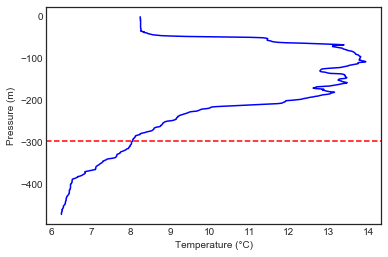

----------------------------------------------
day: 26 --- lon: 71.0817 --- lat: 41.2283
floor depth:               41
surfacetemp avg of top 5m: 3.8233333333333333
temperature at depth:      3.99
depth:                     12.0


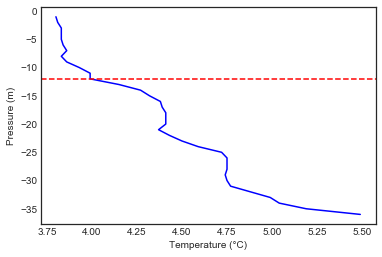

----------------------------------------------
day: 27 --- lon: 71.5117 --- lat: 41.23
floor depth:               36
surfacetemp avg of top 5m: 4.503333333333333
temperature at depth:      4.58
depth:                     31.0
ALL MIXED
----------------------------------------------
day: 27 --- lon: 71.45 --- lat: 40.9817
floor depth:               50
surfacetemp avg of top 5m: 5.868333333333334
temperature at depth:      6.05
depth:                     21.0


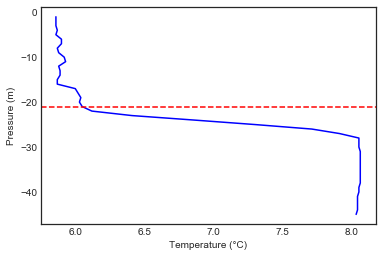

----------------------------------------------
day: 27 --- lon: 70.8467 --- lat: 40.64
floor depth:               68
surfacetemp avg of top 5m: 4.903333333333333
temperature at depth:      5.09
depth:                     39.0


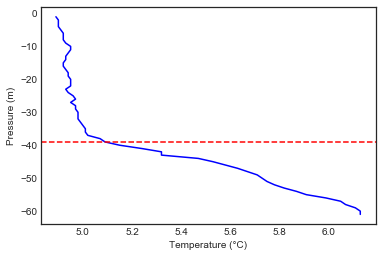

----------------------------------------------
day: 27 --- lon: 70.8467 --- lat: 40.395
floor depth:               88
surfacetemp avg of top 5m: 6.113333333333333
temperature at depth:      6.27
depth:                     71.0


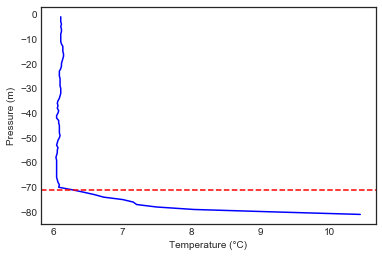

----------------------------------------------
day: 27 --- lon: 70.285 --- lat: 40.1883
floor depth:               108
surfacetemp avg of top 5m: 7.0520000000000005
temperature at depth:      7.07
depth:                     14.0


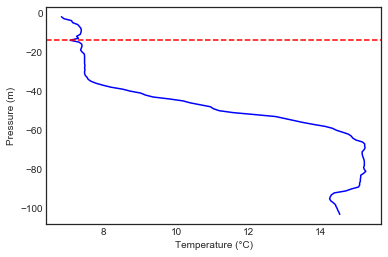

----------------------------------------------
day: 27 --- lon: 70.28 --- lat: 40.145
floor depth:               118
surfacetemp avg of top 5m: 7.371666666666667
temperature at depth:      7.48
depth:                     23.0


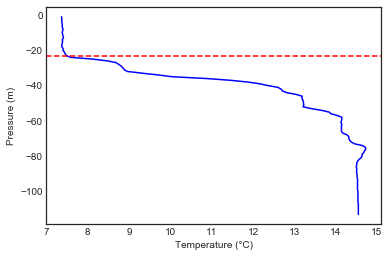

----------------------------------------------
day: 27 --- lon: 70.845 --- lat: 40.1483
floor depth:               135
surfacetemp avg of top 5m: 7.278333333333333
temperature at depth:      7.35
depth:                     32.0


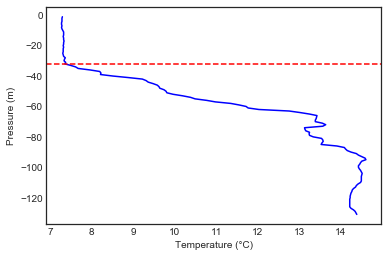

----------------------------------------------
day: 27 --- lon: 71.855 --- lat: 39.845
floor depth:               158
surfacetemp avg of top 5m: 7.54
temperature at depth:      7.73
depth:                     15.0


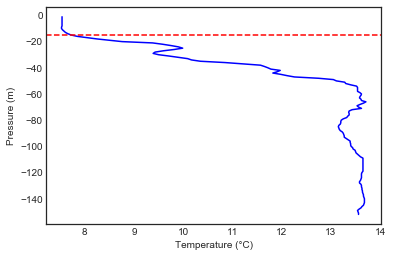

----------------------------------------------
day: 27 --- lon: 71.8617 --- lat: 39.8417
floor depth:               158
surfacetemp avg of top 5m: 7.575
temperature at depth:      7.76
depth:                     14.0


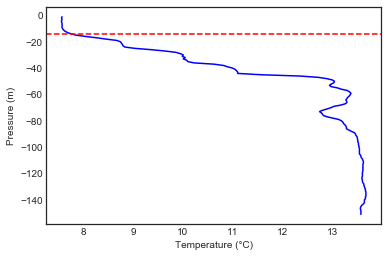

----------------------------------------------
day: 27 --- lon: 71.965 --- lat: 39.925
floor depth:               96
surfacetemp avg of top 5m: 8.153333333333334
temperature at depth:      8.25
depth:                     54.0


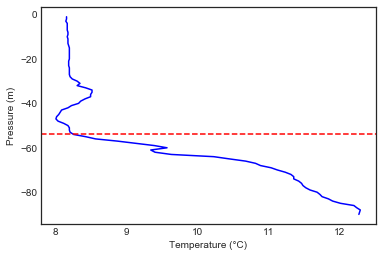

----------------------------------------------
day: 27 --- lon: 72.17 --- lat: 40.015
floor depth:               80
surfacetemp avg of top 5m: 7.471666666666667
temperature at depth:      7.62
depth:                     41.0


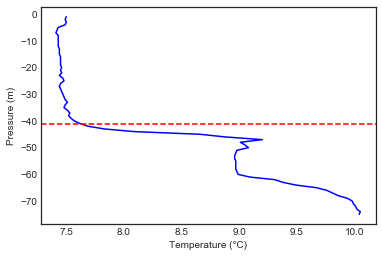

----------------------------------------------
day: 30 --- lon: 71.6133 --- lat: 40.4367
floor depth:               78
surfacetemp avg of top 5m: 7.565
temperature at depth:      7.75
depth:                     54.0


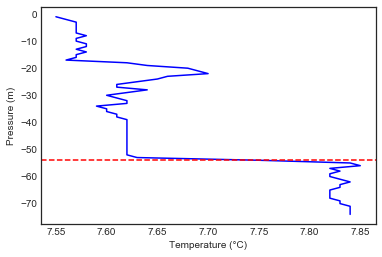

----------------------------------------------
day: 30 --- lon: 72.245 --- lat: 40.5183
floor depth:               54
surfacetemp avg of top 5m: 5.43
temperature at depth:      5.62
depth:                     25.0


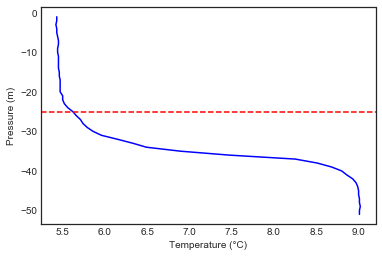

----------------------------------------------
day: 30 --- lon: 72.2467 --- lat: 40.5017
floor depth:               55
surfacetemp avg of top 5m: 5.4383333333333335
temperature at depth:      5.58
depth:                     25.0


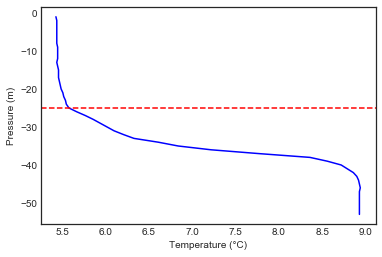

----------------------------------------------
day: 30 --- lon: 72.7783 --- lat: 40.3967
floor depth:               46
surfacetemp avg of top 5m: 6.31
temperature at depth:      6.5
depth:                     21.0


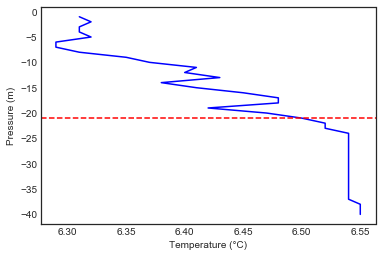

----------------------------------------------
day: 30 --- lon: 72.9083 --- lat: 40.3967
floor depth:               41
surfacetemp avg of top 5m: 5.835
temperature at depth:      6.03
depth:                     22.0


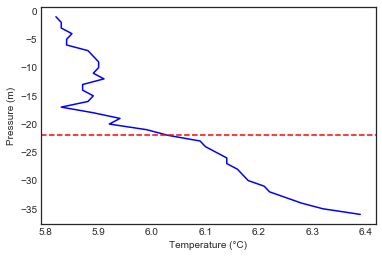

----------------------------------------------
day: 30 --- lon: 73.1483 --- lat: 40.1867
floor depth:               43
surfacetemp avg of top 5m: 6.8566666666666665
temperature at depth:      7.04
depth:                     25.0


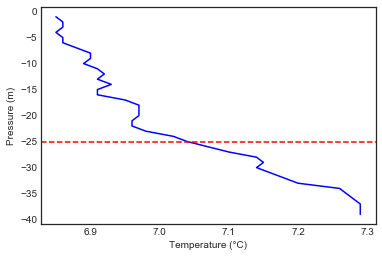

----------------------------------------------
day: 30 --- lon: 73.6767 --- lat: 39.8517
floor depth:               34
surfacetemp avg of top 5m: 4.913333333333333
temperature at depth:      5.11
depth:                     15.0


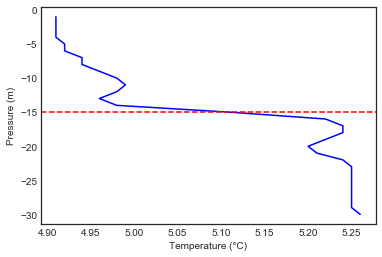

----------------------------------------------
day: 30 --- lon: 73.8033 --- lat: 39.7133
floor depth:               23
surfacetemp avg of top 5m: 4.503333333333333
temperature at depth:      4.7
depth:                     21.0
ALL MIXED
----------------------------------------------
day: 30 --- lon: 73.8017 --- lat: 39.7117
floor depth:               22
surfacetemp avg of top 5m: 4.47
temperature at depth:      4.63
depth:                     10.0


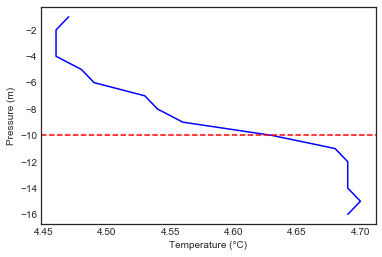

----------------------------------------------
day: 30 --- lon: 72.95 --- lat: 39.605
floor depth:               62
surfacetemp avg of top 5m: 8.803333333333335
temperature at depth:      8.81
depth:                     56.0
ALL MIXED
----------------------------------------------
day: 30 --- lon: 73.0733 --- lat: 39.4833
floor depth:               67
surfacetemp avg of top 5m: 7.67
temperature at depth:      7.81
depth:                     11.0


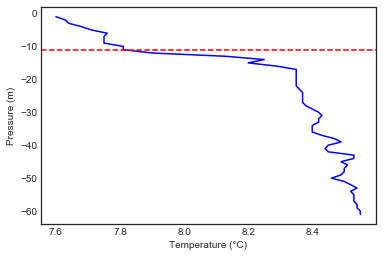

----------------------------------------------
day: 31 --- lon: 73.8717 --- lat: 38.9783
floor depth:               41
surfacetemp avg of top 5m: 4.2716666666666665
temperature at depth:      4.43
depth:                     18.0


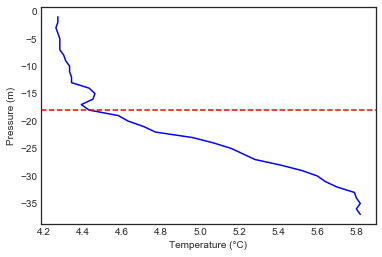

----------------------------------------------
day: 31 --- lon: 73.6433 --- lat: 38.9783
floor depth:               52
surfacetemp avg of top 5m: 5.115
temperature at depth:      5.28
depth:                     16.0


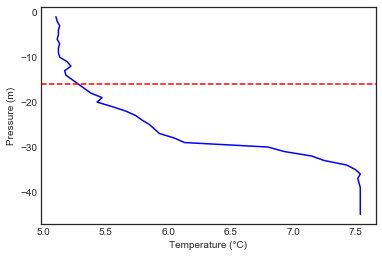

----------------------------------------------
day: 31 --- lon: 73.2733 --- lat: 39.02
floor depth:               71
surfacetemp avg of top 5m: 8.796666666666667
temperature at depth:      8.91
depth:                     66.0
ALL MIXED
----------------------------------------------
day: 31 --- lon: 73.0467 --- lat: 38.77
floor depth:               181
surfacetemp avg of top 5m: 13.39
temperature at depth:      13.22
depth:                     152.0


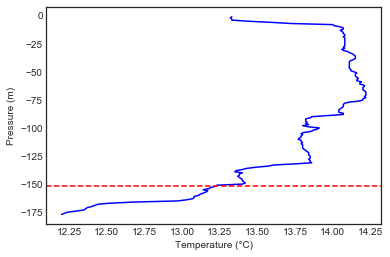

----------------------------------------------
day: 31 --- lon: 73.0767 --- lat: 38.735
floor depth:               147
surfacetemp avg of top 5m: 15.015
temperature at depth:      14.85
depth:                     37.0


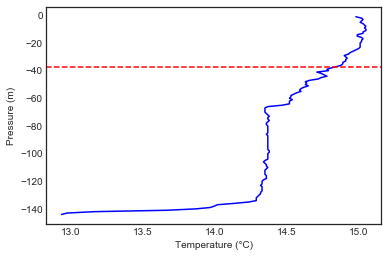

----------------------------------------------
day: 31 --- lon: 74.1067 --- lat: 38.56
floor depth:               54
surfacetemp avg of top 5m: 6.265
temperature at depth:      6.46
depth:                     45.0


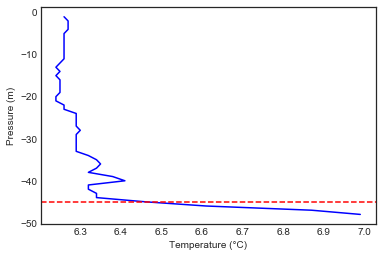

----------------------------------------------
day: 31 --- lon: 74.0433 --- lat: 38.11
floor depth:               83
surfacetemp avg of top 5m: 8.63
temperature at depth:      8.83
depth:                     47.0


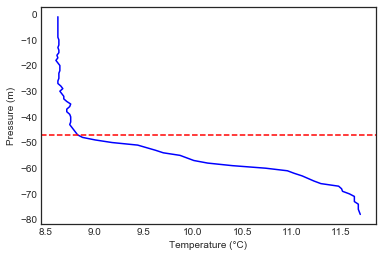

----------------------------------------------
day: 31 --- lon: 74.045 --- lat: 37.8983
floor depth:               158
surfacetemp avg of top 5m: 11.108333333333333
temperature at depth:      11.27
depth:                     32.0


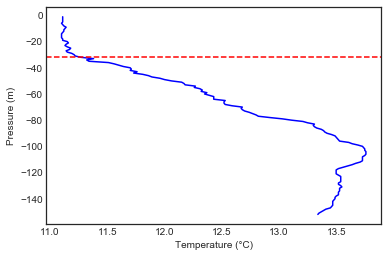

----------------------------------------------
day: 31 --- lon: 74.0417 --- lat: 37.8933
floor depth:               166
surfacetemp avg of top 5m: 10.934999999999999
temperature at depth:      11.13
depth:                     39.0


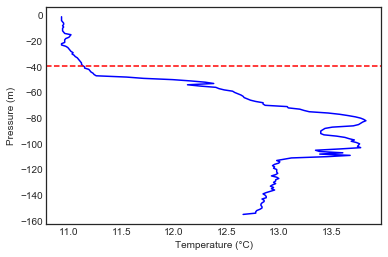

----------------------------------------------


In [201]:
for year in range(2009,2010):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lat = npfile[i]['lat']
        lon = npfile[i]['lon']
        floordepth = npfile[i]['depth']
        if yd <= 31: #273 to 304 Try very small range
#         if yd > 31 and yd <= 59: # Can try seasons / months
            print('day:',yd, '---', 'lon:',lon, '---','lat:',lat)
#             print('')
            print('floor depth:              ', floordepth)
            df_pts = pd.DataFrame({'p':p,'t':t})
            df_ptsnew = df_pts.dropna()
            df_final = pd.DataFrame(df_ptsnew.values) # 0 is pressure, 1 is temperature
#             print(df_final)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            print('surfacetemp avg of top 5m:', surfacevalmean)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    print('temperature at depth:     ',b)
                    print('depth:                    ',dffin.at[i,'pressure'])
                    if dffin.at[i,'pressure'] >= floordepth - 6:
                        print('ALL MIXED')
                        print('----------------------------------------------')
                    elif dffin.at[i,'pressure'] == df_final[0].iloc[-1]:
                        print('INCONCLUSIVE')
                        print('----------------------------------------------')
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        if len(pnew) > 0:
                            yplottable = pnew[0]*-1

                        plt.style.use('seaborn-white')  
                        plt.plot(df_final[1],df_final[0]*-1,color='blue')
                        plt.axhline(y=yplottable, color='r', linestyle='--')
                        plt.xlabel('Temperature (°C)')
                        plt.ylabel('Pressure (m)')
                        plt.grid(False)
                        plt.show()
                        print('----------------------------------------------')                        
                    break

In [114]:
# Trying things out
l = [3, 2.5, 2.5, 2.0, 2.0, 1.5, 1.0, 0.5, 0]
y = [2,3,4,5,6,7,8,9, 10]
l_reversed = list(reversed(l))
# print(type(l_reversed))
# print(l_reversed)

# # Threshold of 1.0 in x side
# # Should result in 2 and 6 
for i in range(len(l)):
    highestl = l[0]
    threshold = highestl - 1
    if l_reversed[i] >= threshold:
        print(l_reversed[i],y[i])
        break

2.0 6


In [281]:
# Try 0.2°C threshold for a given profile in 2010
applength = []
for year in range(2019,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    for i in range(len(npfile)):
        p = npfile[i]['p']
        if p[0] <= 5:
            applength.append(i)

print(len(npfile))
print(len(applength))

1341
1339


In [188]:
# Try 0.2°C threshold for a given profile in 2010
pnew = []
for year in range(2010,2011):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
#     for i in range(len(npfile)):
    for i in range(183,184):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lat = npfile[i]['lat']
        lon = npfile[i]['lon']
        
        print('--',lon,lat,yd,'--')
        
        t_reversed = list(reversed(t))
        p_reversed = list(reversed(p))
        
        for i in range(len(t)):
            highest_temp = t[0]
            threshold = highest_temp - 0.20
            if t_reversed[i] >= threshold:
                print(t_reversed[i],p_reversed[i])
                pnew.append(p_reversed[i])
                break
        print(pnew)
        df_pts = pd.DataFrame({'p':p,'t':t, 's':s})

-- 73.7433 39.97 141 --
11.85 4
[4]


In [616]:
a = np.array([1,2,3,4,5])

for i in range(len(a)):
    b = a[i]
#     print(b)
    if (a[i] >= 1) & (a[i] <= 5) == False:
        print(b)
        break 
(a > 1) & (a < 5)

array([False,  True,  True,  True, False])

In [654]:
import statistics # Try 0.2°C threshold for a given profile in 2010

for year in range(2019,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lat = npfile[i]['lat']
        lon = npfile[i]['lon']
        if yd >= 283: #273 to 304
#         if yd >= 273 and yd <= 365: #273 to 304
            print(yd, '---', lon, '---',lat)
            df_pts = pd.DataFrame({'p':p,'t':t})
            df_ptsnew = df_pts.dropna()
            df_final = pd.DataFrame(df_ptsnew.values) # 0 is pressure, 1 is temperature
#             print(df_final)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            print('surfacetemp:', surfacevalmean)
            tempfin = []
            pressurefin = []
#             threshold = surfacevalmean - 0.2
#             threshold = surfacevalmean + 0.2
#             print('threshold:', threshold)
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []

            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    print(b, dffin.at[i,'pressure'])
                    pnew.append(dffin.at[i,'pressure'])
                    break
            print(pnew)
            if len(pnew) > 0:
                yplottable = pnew[0]*-1
                print(yplottable)
            
                plt.style.use('seaborn-white')  
                plt.plot(df_final[1],df_final[0]*-1,color='blue')
                plt.axhline(y=yplottable, color='r', linestyle='--')
                plt.xlabel('Temperature (°C)')
                plt.ylabel('Pressure (m)')
                plt.grid(False)
                plt.show()

#                 if dffin.at[i,'temp'] >= threshold:
# #                     print(dffin.at[i,'temp'],dffin.at[i,'pressure'])
#                     print('mixed layer depth:', dffin.at[i,'pressure'])
#                     pnew.append(dffin.at[i,'pressure'])
#                     break
# #             print(pnew)
# #             print('')
#             yplottable = pnew[0]*-1
# #             print(yplottable)

#             plt.style.use('seaborn-white')  
#             plt.plot(df_final[1],df_final[0]*-1,color='blue')
#             plt.axhline(y=yplottable, color='r', linestyle='--')
#             plt.xlabel('Temperature (°C)')
#             plt.ylabel('Pressure (m)')
#             plt.grid(False)
#             plt.show()
 
# #             lonneg = -1 * lon; lat = 1 * lat

# #             plt.figure(figsize=(8, 8))
# #             ax = plt.axes(projection=ccrs.PlateCarree())
# #             ax.set_extent([-78, -65, 34, 44.5], ccrs.PlateCarree())
# #             feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='grey')
# #             ax.add_feature(feature)
# #             gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
# #             gl.xlabels_top = False; gl.ylabels_left = False
# #             gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
# #             plt.plot(lonneg, lat,  linewidth=0, markersize=5, marker='o', color='blue')
# #             plt.show()

285 --- 70.65166666666667 --- 41.29666666666667
surfacetemp: 15.77428861391697
15.78479036779988 20.0
[20.0]
-20.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

285 --- 70.70833333333333 --- 41.14666666666667
surfacetemp: 16.469207225594502
16.3470322371911 15.0
[15.0]
-15.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

285 --- 70.22833333333332 --- 40.919999999999995
surfacetemp: 13.979153298697412
14.117514928595272 29.0
[29.0]
-29.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

285 --- 70.16166666666666 --- 40.96666666666667
surfacetemp: 14.017867904240378
14.012292129757004 25.0
[25.0]
-25.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

285 --- 70.08 --- 40.91166666666666
surfacetemp: 13.737118873984071
13.730782690868264 25.0
[25.0]
-25.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

285 --- 69.77 --- 40.92166666666667
surfacetemp: 13.48312530761361
13.444534297743958 31.0
[31.0]
-31.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

285 --- 69.58333333333333 --- 40.88333333333333
surfacetemp: 15.21869943116512
15.388709784315147 8.0
[8.0]
-8.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

285 --- 69.14166666666667 --- 40.919999999999995
surfacetemp: 15.755668983643746
15.5761666089758 10.0
[10.0]
-10.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

286 --- 68.62666666666668 --- 40.73166666666667
surfacetemp: 15.048499218724974
15.17290021169995 25.0
[25.0]
-25.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

286 --- 68.27833333333334 --- 40.76833333333333
surfacetemp: 17.40368155154827
17.320526741121512 57.0
[57.0]
-57.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

286 --- 68.34833333333333 --- 40.623333333333335
surfacetemp: 22.991908506161273
22.826319142049705 33.0
[33.0]
-33.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

286 --- 68.81 --- 40.556666666666665
surfacetemp: 16.350777216730393
16.515598584364902 6.0
[6.0]
-6.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

286 --- 68.93166666666666 --- 40.401666666666664
surfacetemp: 22.824416004974555
22.657944610856003 61.0
[61.0]
-61.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

286 --- 68.36666666666666 --- 40.175
surfacetemp: 25.66520867653923
25.621397951761036 31.0
[31.0]
-31.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

286 --- 68.2 --- 40.42333333333333
surfacetemp: 24.180653842509145
24.26857067966061 41.0
[41.0]
-41.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

286 --- 68.03166666666667 --- 40.465
surfacetemp: 24.95618315828502
24.76629726161581 31.0
[31.0]
-31.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

286 --- 67.8 --- 40.595
surfacetemp: 21.71372810288838
21.66821070480024 61.0
[61.0]
-61.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 67.775 --- 40.5
surfacetemp: 23.13266244863667
22.974375821782782 49.0
[49.0]
-49.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 67.725 --- 40.544999999999995
surfacetemp: 23.017647067944537
22.85255667528415 37.0
[37.0]
-37.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 67.36666666666666 --- 40.46666666666667
surfacetemp: 23.444433495546427
23.433260905053718 58.0
[58.0]
-58.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 67.27333333333333 --- 40.559999999999995
surfacetemp: 21.43902367449739
21.2492984373819 40.0
[40.0]
-40.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 67.51 --- 40.70166666666667
surfacetemp: 22.08901040276769
21.92361065593601 50.0
[50.0]
-50.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 67.56166666666667 --- 40.73166666666667
surfacetemp: 20.225992510309304
20.097332474004983 72.0
[72.0]
-72.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 67.38166666666666 --- 40.93833333333334
surfacetemp: 14.5123554227312
14.313915051504427 13.0
[13.0]
-13.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 67.52666666666667 --- 40.980000000000004
surfacetemp: 14.664872165423368
14.722328567087294 27.0
[27.0]
-27.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 67.31666666666666 --- 41.15
surfacetemp: 13.996017852621957
13.796875878087526 32.0
[32.0]
-32.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 71.175 --- 41.330000000000005
surfacetemp: 16.966122666009912
16.86589854239425 8.0
[8.0]
-8.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 71.17 --- 41.083333333333336
surfacetemp: 16.38174667146706
16.280755094943103 26.0
[26.0]
-26.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 67.42833333333333 --- 41.269999999999996
surfacetemp: 14.581255277831863
14.563740865710866 40.0
[40.0]
-40.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

287 --- 71.24833333333332 --- 41
surfacetemp: 16.16902883549063
16.023137157580692 32.0
[32.0]
-32.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 67.63333333333334 --- 41.083333333333336
surfacetemp: 14.098036945205617
14.117388911344655 50.0
[50.0]
-50.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 67.63833333333334 --- 41.055
surfacetemp: 14.126807686277843
14.005479213759216 53.0
[53.0]
-53.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 71.83666666666666 --- 40.58166666666667
surfacetemp: 17.119851881080503
17.249762226624085 53.0
[53.0]
-53.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 67.88666666666667 --- 41.089999999999996
surfacetemp: 14.762922982274674
14.724291433025073 45.0
[45.0]
-45.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 71.91666666666667 --- 40.665
surfacetemp: 16.628573103002598
16.44969351326306 38.0
[38.0]
-38.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 67.875 --- 41.30833333333333
surfacetemp: 15.681669444085518
15.702141717500748 36.0
[36.0]
-36.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 72.49499999999999 --- 40.66166666666666
surfacetemp: 17.471319678334698
17.298381577747374 25.0
[25.0]
-25.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 72.98833333333333 --- 40.66166666666666
surfacetemp: 17.35458437677377
17.35083502319038 9.0
[9.0]
-9.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 68.01 --- 41.27166666666667
surfacetemp: 16.024538938724266
16.025785075287867 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 72.91666666666667 --- 40.580000000000005
surfacetemp: 17.85783095576111
17.843676800615807 20.0
[20.0]
-20.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 68.435 --- 41.20666666666666
surfacetemp: 14.778428271923454
14.60007124925045 48.0
[48.0]
-48.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 72.675 --- 40.336666666666666
surfacetemp: 16.79414291807784
16.912098569639276 16.0
[16.0]
-16.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 72.91499999999999 --- 40.083333333333336
surfacetemp: 16.587051358601098
16.76819703862729 28.0
[28.0]
-28.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

288 --- 74.00166666666668 --- 39.995
surfacetemp: 17.894384652970572
17.94474328459464 15.0
[15.0]
-15.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 70.35 --- 41.83833333333334
surfacetemp: 13.768323966971957
13.775921764307617 22.0
[22.0]
-22.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 70.28333333333333 --- 41.87166666666667
surfacetemp: 13.293254029869026
13.286407088925346 26.0
[26.0]
-26.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 70.185 --- 41.905
surfacetemp: 13.015940128072366
12.864108904498515 21.0
[21.0]
-21.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 73.74166666666666 --- 39.82
surfacetemp: 17.701810254059048
17.72056388789195 22.0
[22.0]
-22.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 73.99333333333334 --- 39.71
surfacetemp: 17.556498539428194
17.567893747602817 18.0
[18.0]
-18.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 74.00333333333333 --- 39.34
surfacetemp: 17.940147348634383
17.932859163079073 25.0
[25.0]
-25.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 73.58999999999999 --- 39.25
surfacetemp: 17.882058518517884
17.745932154168447 32.0
[32.0]
-32.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 73.39333333333335 --- 39.36
surfacetemp: 17.17647822518017
17.06221939550325 47.0
[47.0]
-47.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 67.60833333333333 --- 42.03
surfacetemp: 14.642270706310045
14.49580817572909 42.0
[42.0]
-42.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 72.83166666666666 --- 39.41166666666666
surfacetemp: 17.653690107673675
17.670293718920362 60.0
[60.0]
-60.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

290 --- 67.55833333333334 --- 41.93833333333334
surfacetemp: 14.393905033671283
14.399825771552733 36.0
[36.0]
-36.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 72.58500000000001 --- 39.013333333333335
surfacetemp: 21.782302237906134
21.643903087164738 63.0
[63.0]
-63.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 67.17833333333333 --- 42.04666666666667
surfacetemp: 13.588147120457853
13.463406932934124 25.0
[25.0]
-25.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 72.735 --- 39.05166666666666
surfacetemp: 20.95913331817969
20.778575757435927 50.0
[50.0]
-50.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 72.99833333333332 --- 39.24666666666667
surfacetemp: 17.367166795882383
17.202769779999425 56.0
[56.0]
-56.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 67.05 --- 41.93833333333334
surfacetemp: 13.801470807134782
13.610213691711674 47.0
[47.0]
-47.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 73.16499999999999 --- 39
surfacetemp: 17.237641561609788
17.164302369495392 52.0
[52.0]
-52.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 73.49833333333332 --- 38.998333333333335
surfacetemp: 17.544225185104096
17.743688740786705 45.0
[45.0]
-45.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 73.25 --- 38.585
surfacetemp: 19.332146831236486
19.148612953072792 28.0
[28.0]
-28.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 66.64833333333333 --- 41.83500000000001
surfacetemp: 12.417992833998532
12.326809026983117 68.0
[68.0]
-68.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 66.61333333333333 --- 41.80833333333333
surfacetemp: 12.574244174152103
12.460675517515922 6.0
[6.0]
-6.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 66.92 --- 41.75833333333333
surfacetemp: 13.429782408007028
13.482532667365613 63.0
[63.0]
-63.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 67.345 --- 41.644999999999996
surfacetemp: 14.952446390239274
14.754186716981598 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

291 --- 74.25833333333334 --- 37.70333333333333
surfacetemp: 19.365878533258552
19.23323021656843 57.0
[57.0]
-57.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 74.40666666666667 --- 37.66833333333333
surfacetemp: 18.718687430004273
18.529525946136243 18.0
[18.0]
-18.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 67.305 --- 41.56333333333334
surfacetemp: 14.846769622895286
14.861694438391076 42.0
[42.0]
-42.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 74.66333333333334 --- 37.583333333333336
surfacetemp: 18.796734036652154
18.618207756631712 27.0
[27.0]
-27.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 67.00833333333334 --- 41.38333333333333
surfacetemp: 13.843482875367139
14.036664049104466 32.0
[32.0]
-32.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 75.16499999999999 --- 37.33166666666667
surfacetemp: 19.041997533987818
19.13748857846812 27.0
[27.0]
-27.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 66.74666666666667 --- 41.28
surfacetemp: 13.251652444451238
13.137518273888963 75.0
[75.0]
-75.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 66.99333333333334 --- 41.18666666666666
surfacetemp: 13.88161360869352
14.055232895878829 38.0
[38.0]
-38.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 74.67 --- 37.830000000000005
surfacetemp: 18.501720618597428
18.432086169968496 30.0
[30.0]
-30.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 66.83 --- 40.901666666666664
surfacetemp: 14.052267528128073
13.909906515454134 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 74.50833333333334 --- 38.16166666666666
surfacetemp: 18.02945901836801
18.213936522677084 21.0
[21.0]
-21.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 66.71499999999999 --- 40.836666666666666
surfacetemp: 15.331464429759695
15.516040798418539 12.0
[12.0]
-12.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 66.71000000000001 --- 40.8
surfacetemp: 14.435836502015105
14.346498872988114 51.0
[51.0]
-51.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 74.91833333333334 --- 38.665
surfacetemp: 17.331587713167224
[]
292 --- 74.75333333333333 --- 38.416666666666664
surfacetemp: 18.023217759709333
18.14251742392478 26.0
[26.0]
-26.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 66.41000000000001 --- 41.038333333333334
surfacetemp: 15.003494020627674
15.058111564849057 39.0
[39.0]
-39.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 66.40833333333333 --- 41.04666666666667
surfacetemp: 14.946728236691694
14.755786303044674 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 74.91333333333334 --- 38.330000000000005
surfacetemp: 18.120230538463247
18.12551851462495 9.0
[9.0]
-9.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

292 --- 66.46666666666667 --- 41.05
surfacetemp: 14.834835963733429
14.64691316450879 46.0
[46.0]
-46.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 66.57666666666667 --- 41.148333333333326
surfacetemp: 14.391313908317894
14.299795094906848 26.0
[26.0]
-26.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 66.43833333333333 --- 41.23833333333334
surfacetemp: 13.647201657014342
13.651192851201603 53.0
[53.0]
-53.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 66.59833333333333 --- 41.538333333333334
surfacetemp: 12.466519747252306
12.278106646545726 14.0
[14.0]
-14.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 66.33333333333333 --- 41.57166666666667
surfacetemp: 13.914445153367598
13.884006064596521 55.0
[55.0]
-55.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 66.23666666666666 --- 41.523333333333326
surfacetemp: 14.430701854991925
14.458259388489353 24.0
[24.0]
-24.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 66.34833333333333 --- 41.38999999999999
surfacetemp: 14.161865803568718
14.013311287899748 23.0
[23.0]
-23.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 75.68833333333333 --- 37.25
surfacetemp: 19.112636495197833
19.183585433519077 10.0
[10.0]
-10.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 66.16666666666667 --- 41.44166666666667
surfacetemp: 14.474942879009411
14.35803933413572 39.0
[39.0]
-39.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 75.50166666666668 --- 37.166666666666664
surfacetemp: 19.38007067241797
19.383143601536403 15.0
[15.0]
-15.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 66.05166666666668 --- 41.4
surfacetemp: 14.43328439468953
14.248971029557776 46.0
[46.0]
-46.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 75.82666666666667 --- 36.67166666666667
surfacetemp: 19.523545651544985
19.51056293054262 14.0
[14.0]
-14.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 66.01 --- 41.760000000000005
surfacetemp: 15.023378483642908
15.210729547365592 12.0
[12.0]
-12.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 75.42 --- 36.583333333333336
surfacetemp: 20.022860338995187
20.02877501167991 16.0
[16.0]
-16.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 75.49666666666667 --- 36.501666666666665
surfacetemp: 20.021071891029806
20.023004781067357 24.0
[24.0]
-24.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 65.74166666666666 --- 41.769999999999996
surfacetemp: 17.41540597588576
17.216207749922958 55.0
[55.0]
-55.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

293 --- 75.47166666666666 --- 35.99666666666667
surfacetemp: 20.965740186302256
21.00483197214646 22.0
[22.0]
-22.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 65.875 --- 41.975
surfacetemp: 15.113603526977153
14.958585770336713 89.0
[89.0]
-89.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 75.40833333333333 --- 35.42166666666667
surfacetemp: 22.574708017310364
22.708553069251256 11.0
[11.0]
-11.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 65.90666666666667 --- 42.26833333333334
surfacetemp: 13.417967290907614
13.305702114267216 103.0
[103.0]
-103.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 75.33500000000001 --- 35.580000000000005
surfacetemp: 22.231405318814325
22.39896082907899 23.0
[23.0]
-23.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 66.14 --- 42.175
surfacetemp: 14.205122694904116
14.39967128266518 24.0
[24.0]
-24.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 75.17666666666668 --- 35.995
surfacetemp: 20.81181956492477
20.839472204404238 14.0
[14.0]
-14.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 66.36666666666666 --- 42.36000000000001
surfacetemp: 13.386724227201901
13.292843576267636 22.0
[22.0]
-22.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 75.00166666666668 --- 35.99666666666667
surfacetemp: 22.84043692249598
22.864756373517785 40.0
[40.0]
-40.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 66.36999999999999 --- 42.36833333333334
surfacetemp: 13.393432941664623
13.231695523181264 25.0
[25.0]
-25.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 74.78166666666667 --- 36
surfacetemp: 25.443185837045906
25.301346332160158 40.0
[40.0]
-40.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 74.67333333333333 --- 35.998333333333335
surfacetemp: 26.708174184853515
26.75557705539704 54.0
[54.0]
-54.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 66.29666666666667 --- 42.13
surfacetemp: 13.426099634632518
13.255014624142234 42.0
[42.0]
-42.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 74.83666666666666 --- 36.33166666666667
surfacetemp: 21.813630599482288
21.73874443147264 56.0
[56.0]
-56.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 66.75666666666666 --- 42.18
surfacetemp: 14.042176080676642
14.001586333130144 19.0
[19.0]
-19.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 75.25166666666668 --- 36.75
surfacetemp: 19.0059610863361
18.831091289071665 26.0
[26.0]
-26.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 66.86166666666666 --- 42.13666666666666
surfacetemp: 13.656430187871111
13.514578820705362 27.0
[27.0]
-27.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 75.08500000000001 --- 36.915
surfacetemp: 18.775078587049418
18.583588349514564 43.0
[43.0]
-43.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

294 --- 66.94833333333332 --- 42.16499999999999
surfacetemp: 13.597582593062535
13.513412299322942 35.0
[35.0]
-35.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

295 --- 74.58500000000001 --- 37.84166666666667
surfacetemp: 17.98700109247777
17.82290703155196 51.0
[51.0]
-51.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

295 --- 74.95 --- 37.99666666666667
surfacetemp: 18.128716263371494
17.99747651758646 22.0
[22.0]
-22.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

295 --- 67.60166666666667 --- 42.236666666666665
surfacetemp: 13.782310491278281
13.665094142791004 53.0
[53.0]
-53.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

295 --- 73.92666666666668 --- 38.413333333333334
surfacetemp: 18.921843553371403
18.744215669947007 52.0
[52.0]
-52.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

295 --- 67.525 --- 42.166666666666664
surfacetemp: 13.768288698810338
13.57032487901604 22.0
[22.0]
-22.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

295 --- 73.92 --- 38.745
surfacetemp: 16.924122971683726
17.05886522067286 15.0
[15.0]
-15.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

295 --- 74.08333333333333 --- 38.913333333333334
surfacetemp: 17.51968757174069
17.320446836162933 23.0
[23.0]
-23.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

295 --- 67.815 --- 41.68500000000001
surfacetemp: 14.690926822685778
14.695544561928537 30.0
[30.0]
-30.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 68.175 --- 41.76833333333334
surfacetemp: 14.423098017867945
14.285197136464646 48.0
[48.0]
-48.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 68.33999999999999 --- 41.75666666666666
surfacetemp: 14.043642069374219
13.864951653473463 25.0
[25.0]
-25.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 68.24499999999999 --- 41.51166666666666
surfacetemp: 14.906367135168844
14.918031903860594 37.0
[37.0]
-37.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 72.42 --- 39.748333333333335
surfacetemp: 17.052657358689963
16.938963924404746 69.0
[69.0]
-69.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 68.2 --- 41.50166666666667
surfacetemp: 15.012865977351247
14.98875112182019 42.0
[42.0]
-42.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 72.41499999999999 --- 40.075
surfacetemp: 16.185524705397285
16.379278782186322 62.0
[62.0]
-62.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 72.33500000000001 --- 39.913333333333334
surfacetemp: 16.32203897075639
16.436262716787695 70.0
[70.0]
-70.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 68.85 --- 41.38666666666666
surfacetemp: 13.40443448740434
13.231339834286816 35.0
[35.0]
-35.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 72.00166666666668 --- 39.75
surfacetemp: 21.15215915086641
21.068845683869146 84.0
[84.0]
-84.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 68.94666666666667 --- 41.32333333333333
surfacetemp: 13.461248587722434
13.286250586371404 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 71.67 --- 40.080000000000005
surfacetemp: 18.62682709536015
18.790135066367316 75.0
[75.0]
-75.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 68.97666666666667 --- 41.10666666666666
surfacetemp: 13.891765568446274
13.749649245592588 26.0
[26.0]
-26.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 71.41833333333334 --- 40.5
surfacetemp: 19.088744981931683
19.25327767257726 58.0
[58.0]
-58.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 69.07666666666667 --- 41.14333333333334
surfacetemp: 13.708707840712453
13.549658773719404 23.0
[23.0]
-23.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 71.16666666666667 --- 40.330000000000005
surfacetemp: 19.325588928361277
19.198066472851075 48.0
[48.0]
-48.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 69.11166666666666 --- 41.12166666666667
surfacetemp: 13.724191296798253
13.537948470501327 13.0
[13.0]
-13.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

296 --- 70.91666666666667 --- 40.248333333333335
surfacetemp: 19.265210670766436
19.185349006322603 42.0
[42.0]
-42.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.63000000000001 --- 39.84
surfacetemp: 21.54743438465404
21.493700033014193 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.62666666666668 --- 39.835
surfacetemp: 21.492430927501804
21.415269849250443 49.0
[49.0]
-49.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.60833333333333 --- 40.03666666666666
surfacetemp: 21.006245832654756
20.810628179859556 66.0
[66.0]
-66.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.605 --- 40.038333333333334
surfacetemp: 20.99348325141757
20.818423470542314 77.0
[77.0]
-77.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.74833333333332 --- 40.495
surfacetemp: 19.82267544122289
19.96132886653177 53.0
[53.0]
-53.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.61833333333334 --- 40.665
surfacetemp: 16.771665071528606
16.91079127244925 7.0
[7.0]
-7.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.61999999999999 --- 40.669999999999995
surfacetemp: 16.4801952502729
16.675107002995194 10.0
[10.0]
-10.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.63000000000001 --- 41.095
surfacetemp: 14.547310069384897
14.710688902227878 20.0
[20.0]
-20.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.63333333333334 --- 41.09833333333333
surfacetemp: 14.602224993405535
14.771368428556315 24.0
[24.0]
-24.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.42 --- 40.995
surfacetemp: 14.155690772769933
14.350622523947855 15.0
[15.0]
-15.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 70.105 --- 40.995
surfacetemp: 13.89943752989243
13.906679641020109 23.0
[23.0]
-23.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

297 --- 69.66666666666667 --- 40.665
surfacetemp: 15.460575737637958
15.308186321345396 49.0
[49.0]
-49.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 70 --- 40.34
surfacetemp: 16.974953484054218
17.024186149539595 6.0
[6.0]
-6.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 69.76666666666667 --- 40.33166666666667
surfacetemp: 18.748658543339992
[]
298 --- 69.33833333333334 --- 40.163333333333334
surfacetemp: 19.48633184672274
19.400124282368775 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 69.00333333333333 --- 40.07833333333333
surfacetemp: 21.830336791806012
21.74455896752087 56.0
[56.0]
-56.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 68.42 --- 40.245
surfacetemp: 18.49890927480262
[]
298 --- 68.42333333333333 --- 40.25333333333333
surfacetemp: 18.32177370445541
18.27793309762832 60.0
[60.0]
-60.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 68.58166666666666 --- 40.575
surfacetemp: 17.081686948516957
17.255513091309133 7.0
[7.0]
-7.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 68.66166666666666 --- 40.498333333333335
surfacetemp: 21.247445238583182
21.34487543187787 56.0
[56.0]
-56.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 68.66000000000001 --- 40.505
surfacetemp: 19.859107372064685
19.73203916543277 72.0
[72.0]
-72.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 69.08666666666666 --- 40.498333333333335
surfacetemp: 15.64326298963914
15.703230368317794 10.0
[10.0]
-10.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 69.25500000000001 --- 40.41166666666666
surfacetemp: 16.179738948018162
16.363890460676174 8.0
[8.0]
-8.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 69.33166666666666 --- 40.74666666666667
surfacetemp: 12.852137703562786
12.855542737567701 30.0
[30.0]
-30.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

298 --- 69.15666666666667 --- 40.90333333333333
surfacetemp: 12.336937020228806
12.181851784286653 66.0
[66.0]
-66.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

299 --- 69.08500000000001 --- 41.07833333333333
surfacetemp: 12.13438171982359
11.964848004995458 37.0
[37.0]
-37.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

299 --- 68.17 --- 41.41166666666666
surfacetemp: 15.00842006173121
15.039709865470849 42.0
[42.0]
-42.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

299 --- 68.33500000000001 --- 41.16166666666666
surfacetemp: 14.778765724512299
14.790099964687187 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

299 --- 68.00666666666666 --- 40.66833333333333
surfacetemp: 14.217131716081456
14.403835915648019 47.0
[47.0]
-47.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

299 --- 67.69833333333332 --- 40.25
surfacetemp: 20.119945433620977
19.975188683077302 49.0
[49.0]
-49.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

299 --- 67.69166666666666 --- 40.38333333333333
surfacetemp: 17.440128163949968
17.324067784795776 50.0
[50.0]
-50.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

299 --- 67.18666666666667 --- 40.585
surfacetemp: 17.096908960139597
17.291602738233642 41.0
[41.0]
-41.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

299 --- 67.58999999999999 --- 40.748333333333335
surfacetemp: 14.121109295627942
14.301499809152556 52.0
[52.0]
-52.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

300 --- 67.50333333333333 --- 41.08166666666666
surfacetemp: 13.949315573574696
13.975198782760849 58.0
[58.0]
-58.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

301 --- 67.345 --- 41.089999999999996
surfacetemp: 13.618320761578534
13.633642382817342 50.0
[50.0]
-50.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

301 --- 67.08833333333334 --- 41.24333333333334
surfacetemp: 12.681344950607333
12.495135986267167 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

301 --- 67.08666666666666 --- 41.080000000000005
surfacetemp: 12.51854851522653
12.319421027038747 36.0
[36.0]
-36.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

301 --- 66.68166666666666 --- 40.91166666666666
surfacetemp: 15.715397445363491
15.587302234232116 12.0
[12.0]
-12.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

301 --- 66.75666666666666 --- 41.160000000000004
surfacetemp: 14.123554710990735
14.0031755286517 41.0
[41.0]
-41.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

301 --- 66.34333333333333 --- 41.163333333333334
surfacetemp: 16.074949656303875
15.953393121986283 57.0
[57.0]
-57.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

301 --- 66.57666666666667 --- 41.325
surfacetemp: 16.086923994796503
15.95939680470885 53.0
[53.0]
-53.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

301 --- 66.58666666666666 --- 41.580000000000005
surfacetemp: 12.65358321441714
12.521340335749276 7.0
[7.0]
-7.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

301 --- 66.175 --- 41.58166666666666
surfacetemp: 14.855100726749729
14.738934370009114 14.0
[14.0]
-14.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 66.17 --- 41.905
surfacetemp: 11.096527156071739
10.963056216537776 9.0
[9.0]
-9.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 65.76333333333334 --- 41.99333333333334
surfacetemp: 18.662414424128936
18.485024219647965 62.0
[62.0]
-62.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 65.76666666666667 --- 41.98833333333334
surfacetemp: 18.296399977520498
18.126798024896264 62.0
[62.0]
-62.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 65.77 --- 42.226666666666674
surfacetemp: 13.353959906612161
13.164772642389257 131.0
[131.0]
-131.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 65.77 --- 42.226666666666674
surfacetemp: 13.355966416630318
13.190394682499111 134.0
[134.0]
-134.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 66.33666666666666 --- 42.15333333333333
surfacetemp: 13.070125477128608
12.879497012298392 21.0
[21.0]
-21.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 66.50333333333333 --- 42.160000000000004
surfacetemp: 13.086509423995372
12.888138596989897 23.0
[23.0]
-23.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 67.16333333333334 --- 41.836666666666666
surfacetemp: 13.267552192674515
13.27584395527057 57.0
[57.0]
-57.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 67.25 --- 41.75166666666667
surfacetemp: 13.676684248741719
13.652473578507225 52.0
[52.0]
-52.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 67.16666666666667 --- 41.58166666666666
surfacetemp: 13.552680679006578
13.528722057229125 47.0
[47.0]
-47.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 67.25 --- 41.580000000000005
surfacetemp: 14.272733451241415
14.082762701910081 28.0
[28.0]
-28.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 67.69 --- 41.46333333333334
surfacetemp: 14.448893274121758
14.465920743772472 33.0
[33.0]
-33.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 67.58833333333334 --- 41.58166666666666
surfacetemp: 14.270016979000424
14.273177730754204 36.0
[36.0]
-36.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

302 --- 70.26833333333335 --- 41.91166666666666
surfacetemp: 13.186222631365052
13.105882410535688 27.0
[27.0]
-27.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 67.42666666666668 --- 41.82333333333333
surfacetemp: 13.931790822565059
13.739072651485236 38.0
[38.0]
-38.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 70.275 --- 42.00833333333333
surfacetemp: 13.472264911781123
13.329600910634575 11.0
[11.0]
-11.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 67.69666666666667 --- 42.013333333333335
surfacetemp: 13.01498894369493
12.891518634270234 13.0
[13.0]
-13.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 70.34666666666666 --- 42.02666666666667
surfacetemp: 13.301328559787553
13.112858941732032 8.0
[8.0]
-8.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 67.83833333333334 --- 41.91833333333334
surfacetemp: 12.810488748108401
12.631858304794521 54.0
[54.0]
-54.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 70.455 --- 41.93333333333333
surfacetemp: 13.49287895684108
13.296038051168786 12.0
[12.0]
-12.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 70.42666666666668 --- 42.11833333333334
surfacetemp: 13.31824422455361
13.205495195371602 11.0
[11.0]
-11.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 69.08166666666666 --- 42.419999999999995
surfacetemp: 13.200298983414982
13.025163575269966 11.0
[11.0]
-11.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 70.56666666666666 --- 42.105000000000004
surfacetemp: 13.192581088168343
13.00094002028306 17.0
[17.0]
-17.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 69.405 --- 42.583333333333336
surfacetemp: 12.620725918814157
12.44858276259289 41.0
[41.0]
-41.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 69.42833333333333 --- 42.583333333333336
surfacetemp: 12.815207164489959
12.651278187919464 19.0
[19.0]
-19.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 70.38833333333334 --- 42.33500000000001
surfacetemp: 13.179852710478949
13.07310346796061 9.0
[9.0]
-9.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 69.66499999999999 --- 42.50333333333333
surfacetemp: 12.595707399296945
12.433398568213091 33.0
[33.0]
-33.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 69.675 --- 42.50166666666667
surfacetemp: 12.523791926002065
12.34272626035315 33.0
[33.0]
-33.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 70.58500000000001 --- 42.423333333333325
surfacetemp: 13.131435622063707
12.97766061176205 19.0
[19.0]
-19.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 70.61166666666666 --- 42.43
surfacetemp: 13.207964288938276
13.074567084422524 16.0
[16.0]
-16.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 70.61666666666666 --- 42.425
surfacetemp: 13.220630618658156
13.047597621143442 21.0
[21.0]
-21.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

303 --- 70.47333333333333 --- 42.361666666666665
surfacetemp: 13.21164141915749
13.02880419487226 28.0
[28.0]
-28.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

304 --- 70.25166666666668 --- 42
surfacetemp: 13.328178844890488
13.263065058174764 30.0
[30.0]
-30.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

304 --- 70.74833333333332 --- 42.830000000000005
surfacetemp: 12.213062746014778
12.023200539437775 16.0
[16.0]
-16.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

305 --- 70.66166666666666 --- 42.77166666666667
surfacetemp: 12.206962453713421
12.071908915451118 37.0
[37.0]
-37.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

305 --- 70.00166666666668 --- 42.56333333333334
surfacetemp: 12.018412976824518
11.853725744277652 27.0
[27.0]
-27.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

305 --- 69.89333333333335 --- 42.66833333333334
surfacetemp: 12.136827941666361
11.949013375342618 41.0
[41.0]
-41.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

305 --- 69.79833333333333 --- 42.516666666666666
surfacetemp: 12.264364960142464
12.090109396104577 34.0
[34.0]
-34.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

305 --- 69.30333333333333 --- 42.65333333333333
surfacetemp: 13.080688181341532
12.926822953777979 42.0
[42.0]
-42.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

305 --- 69.20833333333333 --- 42.364999999999995
surfacetemp: 13.364097269970694
13.215925464628878 50.0
[50.0]
-50.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

305 --- 69.19833333333332 --- 42.35666666666666
surfacetemp: 13.364082720298251
13.260918107905919 48.0
[48.0]
-48.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

306 --- 69.42333333333333 --- 42.195
surfacetemp: 12.487159915361273
12.306811126184728 35.0
[35.0]
-35.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

306 --- 68.87166666666667 --- 42.144999999999996
surfacetemp: 12.961990712352694
12.763645514015865 31.0
[31.0]
-31.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

306 --- 68.29166666666667 --- 42.22
surfacetemp: 14.038701844125008
13.893937857051965 36.0
[36.0]
-36.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

306 --- 68.27666666666667 --- 42.22166666666667
surfacetemp: 13.947569420438423
13.75927486864671 66.0
[66.0]
-66.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

306 --- 67.99666666666667 --- 42.580000000000005
surfacetemp: 12.611375560656992
12.419589081334571 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

306 --- 68.16499999999999 --- 42.63666666666666
surfacetemp: 12.883109557729597
12.684606909318966 24.0
[24.0]
-24.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

306 --- 68.23833333333333 --- 42.90333333333333
surfacetemp: 12.301553979504813
12.108495908864295 54.0
[54.0]
-54.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

306 --- 68.32666666666667 --- 42.66166666666666
surfacetemp: 12.001731445482687
11.8082501862923 35.0
[35.0]
-35.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

307 --- 68.77 --- 42.660000000000004
surfacetemp: 12.560830491497024
12.384978100556523 30.0
[30.0]
-30.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

307 --- 68.63000000000001 --- 43.005
surfacetemp: 12.097651952334335
11.93341470774854 72.0
[72.0]
-72.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

307 --- 68.59333333333333 --- 43.04666666666667
surfacetemp: 12.081227528036864
12.089663564897501 52.0
[52.0]
-52.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

307 --- 68.48 --- 43.27666666666667
surfacetemp: 12.292209155872863
12.111600684643587 63.0
[63.0]
-63.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

307 --- 67.63000000000001 --- 43.08166666666666
surfacetemp: 12.882513183869829
12.722783428138033 50.0
[50.0]
-50.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

307 --- 67.45 --- 42.745
surfacetemp: 12.52496828472827
12.367070064377682 45.0
[45.0]
-45.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

307 --- 67.43333333333334 --- 42.495
surfacetemp: 12.480216763971153
12.328235723160613 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

308 --- 67.32 --- 42.50666666666666
surfacetemp: 12.470083991533977
12.315589596593036 68.0
[68.0]
-68.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

308 --- 67.26 --- 42.81333333333334
surfacetemp: 12.179602970449858
12.160487413482581 46.0
[46.0]
-46.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

308 --- 67.575 --- 43.26499999999999
surfacetemp: 11.839350786383799
11.640687910735323 26.0
[26.0]
-26.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

308 --- 67.38833333333334 --- 43.31833333333334
surfacetemp: 11.937409926666092
11.817235177495096 62.0
[62.0]
-62.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

308 --- 67.065 --- 43.201666666666675
surfacetemp: 12.107420248540754
11.945493367116567 62.0
[62.0]
-62.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

308 --- 66.94666666666667 --- 43.33500000000001
surfacetemp: 12.227702255653433
12.039892264683052 39.0
[39.0]
-39.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

308 --- 66.78 --- 43.43166666666666
surfacetemp: 11.983671991905727
11.79155190926893 59.0
[59.0]
-59.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

309 --- 67.325 --- 43.63166666666666
surfacetemp: 12.215711595190074
12.019935333168496 42.0
[42.0]
-42.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

309 --- 67.32333333333332 --- 43.94166666666667
surfacetemp: 11.947296678260841
11.797164318753143 62.0
[62.0]
-62.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

309 --- 67.17833333333333 --- 44.044999999999995
surfacetemp: 11.989331026339244
11.802810299849533 53.0
[53.0]
-53.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

309 --- 67.205 --- 44.12666666666667
surfacetemp: 11.903983011521609
11.723957061723539 72.0
[72.0]
-72.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

309 --- 67.14166666666667 --- 44.095
surfacetemp: 11.89776223495532
11.718033594124268 65.0
[65.0]
-65.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

309 --- 66.69833333333332 --- 44.364999999999995
surfacetemp: 11.683154033344026
11.483622690284177 81.0
[81.0]
-81.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

309 --- 66.75666666666666 --- 44.336666666666666
surfacetemp: 11.652687931771586
11.454152776002338 116.0
[116.0]
-116.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

309 --- 67.155 --- 44.28166666666666
surfacetemp: 11.70827264675306
11.52080410065457 98.0
[98.0]
-98.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

310 --- 67.25500000000001 --- 44.351666666666674
surfacetemp: 11.593794205240386
11.403146376193995 124.0
[124.0]
-124.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

310 --- 67.46166666666666 --- 44.175
surfacetemp: 11.43467546270483
11.23976539583886 99.0
[99.0]
-99.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

310 --- 67.47333333333333 --- 44.17166666666667
surfacetemp: 11.423313692516011
11.2285870584661 100.0
[100.0]
-100.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

310 --- 67.945 --- 43.93
surfacetemp: 11.813023812054851
11.674661455799466 81.0
[81.0]
-81.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

310 --- 67.97833333333332 --- 43.805
surfacetemp: 11.780312819515231
11.642821158711666 89.0
[89.0]
-89.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

310 --- 68.27 --- 43.986666666666665
surfacetemp: 11.488786975693715
11.670851456205149 48.0
[48.0]
-48.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

310 --- 68.41333333333334 --- 43.839999999999996
surfacetemp: 11.864700310644869
11.670348035413584 92.0
[92.0]
-92.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

311 --- 68.425 --- 43.839999999999996
surfacetemp: 11.83923370606124
11.668144960444197 86.0
[86.0]
-86.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

311 --- 68.695 --- 43.62166666666667
surfacetemp: 11.861895275067669
11.694268802925013 106.0
[106.0]
-106.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

311 --- 69.08666666666666 --- 43.50166666666667
surfacetemp: 11.712006873639577
11.517946864569316 79.0
[79.0]
-79.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

311 --- 69.375 --- 43.388333333333335
surfacetemp: 11.295826023438295
11.20191118025897 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

311 --- 69.22666666666667 --- 43.291666666666664
surfacetemp: 11.365041438977158
11.168310572251173 54.0
[54.0]
-54.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

311 --- 69.43 --- 43.19166666666667
surfacetemp: 11.21597830714064
11.03141094900887 30.0
[30.0]
-30.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

311 --- 69.52833333333334 --- 43.07166666666667
surfacetemp: 11.240708163280281
11.104173600565675 58.0
[58.0]
-58.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

312 --- 69.78999999999999 --- 43.53999999999999
surfacetemp: 10.674146949228234
10.478787213951039 86.0
[86.0]
-86.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

312 --- 69.93166666666666 --- 43.49833333333333
surfacetemp: 10.690184178162463
10.503628670665128 77.0
[77.0]
-77.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

312 --- 70.12333333333332 --- 43.20333333333333
surfacetemp: 10.820259662158302
10.64671060577069 89.0
[89.0]
-89.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

312 --- 70.24 --- 43.175
surfacetemp: 10.839689720771963
10.652441729488203 78.0
[78.0]
-78.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

312 --- 69.95166666666667 --- 43.111666666666665
surfacetemp: 10.62437973248421
10.54983448731757 81.0
[81.0]
-81.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

312 --- 70.05 --- 43.05833333333333
surfacetemp: 11.005820612285584
11.049649306301422 36.0
[36.0]
-36.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

312 --- 70.385 --- 43.00833333333333
surfacetemp: 10.877978795108099
10.697975132876484 77.0
[77.0]
-77.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

312 --- 70.13000000000001 --- 42.858333333333334
surfacetemp: 10.829562641871204
10.65339751173378 80.0
[80.0]
-80.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

313 --- 70.45333333333333 --- 42.833333333333336
surfacetemp: 10.890860275179573
10.716989647760684 68.0
[68.0]
-68.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

313 --- 70.42 --- 42.71666666666667
surfacetemp: 10.799222764853166
10.756037446207712 56.0
[56.0]
-56.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

313 --- 70.58333333333333 --- 42.58166666666666
surfacetemp: 10.898581114960582
10.783534738305926 34.0
[34.0]
-34.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

313 --- 70.71833333333333 --- 42.36000000000001
surfacetemp: 11.748107073438138
11.72528751686266 31.0
[31.0]
-31.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

313 --- 70.67333333333333 --- 42.27833333333333
surfacetemp: 11.237866371291545
11.132395846162598 27.0
[27.0]
-27.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

313 --- 70.09166666666667 --- 42.42666666666667
surfacetemp: 11.263329353773884
11.078760794257542 52.0
[52.0]
-52.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

313 --- 70.13666666666667 --- 42.27166666666667
surfacetemp: 10.82417862848692
10.725377958852507 44.0
[44.0]
-44.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

314 --- 69.695 --- 42.12
surfacetemp: 11.474426005539636
11.275138396519578 54.0
[54.0]
-54.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

314 --- 69.74833333333332 --- 42.00666666666666
surfacetemp: 11.80087311807925
11.602004972556728 43.0
[43.0]
-43.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

314 --- 69.96499999999999 --- 41.98166666666666
surfacetemp: 11.234233633388964
11.34878772712198 23.0
[23.0]
-23.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

314 --- 69.90833333333333 --- 41.8
surfacetemp: 11.098748714342518
11.227058686949555 16.0
[16.0]
-16.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

314 --- 69.85166666666667 --- 41.769999999999996
surfacetemp: 11.33319390087541
11.359942937677719 43.0
[43.0]
-43.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

314 --- 69.70666666666666 --- 41.76166666666666
surfacetemp: 11.563238891253516
11.424167251391344 63.0
[63.0]
-63.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

314 --- 69.65833333333333 --- 41.65833333333333
surfacetemp: 11.623118807073226
11.428787419954915 29.0
[29.0]
-29.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

314 --- 69.55833333333334 --- 41.58166666666666
surfacetemp: 11.399911567779267
11.221059631534436 25.0
[25.0]
-25.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

314 --- 69.54166666666667 --- 41.464999999999996
surfacetemp: 11.410568162275307
11.393409503662745 32.0
[32.0]
-32.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

315 --- 69.38166666666666 --- 41.375
surfacetemp: 11.298625411966812
11.10543193461641 30.0
[30.0]
-30.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

315 --- 69.33999999999999 --- 41.51166666666666
surfacetemp: 11.424785155477503
11.260984097961888 41.0
[41.0]
-41.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

315 --- 69.375 --- 41.69666666666667
surfacetemp: 11.770688257341064
11.658621427910258 36.0
[36.0]
-36.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

315 --- 68.96000000000001 --- 41.63
surfacetemp: 11.943549334780144
11.750129366432166 52.0
[52.0]
-52.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

315 --- 70.05 --- 42.07166666666667
surfacetemp: 11.035690382494861
11.04714480746768 29.0
[29.0]
-29.0


KeyError: (18.1, 0.0, '18.1', '.15', 'top', 'center', -1198228599432993253, None, None, 72.0, <weakref at 0xb28da1908; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

In [ ]:
#             for x in range(len(dffin)):
#             pnewnewnew = []
#             if dffin.at[5,'temp'] > dffin.at[0,'temp']:
#                 threshold = surfacevalmean + 0.20
#                 print('threshold:',threshold)
#                 for y in range(len(dffin)):
#                     if dffin.at[y,'temp'] >= threshold:
#                         print(dffin.at[y,'temp'], dffin.at[y,'pressure'])
#                         pnewnewnew.append(dffin.at[y,'pressure'])
#                         break
#                 print(pnewnewnew)            
#             if dffin.at[5,'temp'] < dffin.at[0,'temp']:                
#                 threshold = surfacevalmean - 0.20
#                 print('threshold:',threshold)
#                 for y in range(len(dffin)):
#                     if dffin.at[y,'temp'] <= threshold:
#                         print(dffin.at[y,'temp'], dffin.at[y,'pressure'])
#                         pnewnewnew.append(dffin.at[y,'pressure'])
#                         break
#                 print(pnewnewnew)            
#             print('')
            
            
            
#             if t_reversed[i] >= threshold:
#                 print(t_reversed[i],p_reversed[i])
#                 pnew.append(p_reversed[i])
#                 break
#         print(pnew)
#         df_pts = pd.DataFrame({'p':p,'t':t, 's':s})
                
                
#                 print(x, dffin['temp'])
#                 print(dffin.at[0,'temp'])
#                 print(df_final[1][iii],df_final[1][iii-1] )
#                 iii = 1
#                 if df_final[1][iii] < df_final[0][iii-1]:
#                     threshold = surfacevalmean - 0.20
# #                     print(df_final[1][iii])
#                     print('surfacevalumean:', surfacevalmean)
#                     print('threshold:', threshold)
# #                     for iv in range(numrange[-1],len(df_final)):
# #                         if df_final[1][iv] >= threshold:
# #                             print(df_final[1][iv], df_final[0][iv])
# #                             print('')
# #                             break
#                     break

In [ ]:
#                     if df_final[1][iii] <= threshold:
#                         print(df_final[1][iii])
#                         print(df_final[1][iii], df_final[0][iii])
#                         break
                    break
#                 if df_final[1][iii] < df_final[0][iii-1]:
#                     threshold = surfacevalmean - 0.20
#                     print('surfacevalumean:', surfacevalmean)
#                     print('threshold:', threshold)
#                     for iv in range(numrange[-1],len(df_final)):
#                         if df_final[1][iv] >= threshold:
#                             print(df_final[1][iv], df_final[0][iv])
#                             break
#                     break
#             for iv in range(numrange[-1],len(df_final)):
#                 if df_final[1][iv] >= threshold:
#                     print(df_final[1][iv], df_final[0][iv])
#                     break


#                 if df_final[1][iv] <= threshold:
#                     print(df_final[1][iv], df_final[0][iv])
#                     break

#             print(threshold)
            
        
        
        
#             if t[i] >= threshold:
#                 print(t[i],p[i])
#                 pnew.append(p[i])
#                 break
#         print(pnew)
#         df_pts = pd.DataFrame({'p':p,'t':t, 's':s})


#             threshold = surfacevalmean + 0.20
#             print(surfacevalmean)
                        
#             for ii in range(1):
#                 if df_final[1][ii + 1] >= df_final[0][ii]:
#                     threshold = surfacevalmean + 0.20
#                     print('yes')
# #                     break
#                 else:
#                     threshold = surfacevalmean - 0.20
#                     print('no')
# #                     break
#             print('surfacevalumean:', surfacevalmean)
#             print('threshold:', threshold)
            
#             pnewlist = []
#             for i in range(len(df_final)):
#                 if df_final[1][i] >= threshold:
#                     print(df_final[1][i],df_final[0][i] )
#                     pnew = df_final[0][i]
#                     pnewlist.append(pnew)
#                     break
#             print(pnewlist)
                
#             for i in range(len(df_final)):
#                 print(surfacevalmean)
#                 threshold = surfacevalmean + 0.20
#                 print(threshold)
#                 if t[i] >= threshold:
#                     print(t[i],p[i])
#                     break
                    
#                 pnew.append(p[i])
#                 break
#         print(pnew)
#         df_pts = pd.DataFrame({'p':p,'t':t, 's':s})

#             print(df_pts['p'])
#             for i in range(len(df_pts)):
#                 print(df_pts['p'][i])
#                 if df_pts['p'][i] <= 5:
#                     print('yes')
#                 else:
#                     print('no')
#             if df_pt[0]
#             print(df_pts)
#             print(len(df_pts))
#             print(y)
#     for i in range(len(npfile)):
#         yd = npfile[i]['yd']
#         print(i, yd)
# #     for i in range(len(npfile)):
#     for i in range(1788,1789):
#         yd = npfile[i]['yd']
#         p = npfile[i]['p']
#         s = npfile[i]['s']
#         t = npfile[i]['t']
#         lat = npfile[i]['lat']
#         lon = npfile[i]['lon']
#         print('--',lon,lat,yd,'--')       
#         t_reversed = list(reversed(t))
#         p_reversed = list(reversed(p))
#         for i in range(len(t)):
#             highest_temp = t[0]
#             threshold = highest_temp + 0.20
#             if t[i] >= threshold:
#                 print(t[i],p[i])
#                 pnew.append(p[i])
#                 break
#         print(pnew)
#         df_pts = pd.DataFrame({'p':p,'t':t, 's':s})

In [326]:
print(df_pts['p'])

0     1
1     5
2    10
3    15
4    20
5    30
Name: p, dtype: uint8


In [212]:
yplottable = pnew[0]*-1
print(yplottable)

-66


In [213]:
print(df_pts)

     p      t       s
0    1  12.43  33.252
1    2  12.43  33.252
2    3  12.43  33.252
3    4  12.44  33.252
4    5  12.44  33.253
..  ..    ...     ...
62  63  12.50  33.275
63  64  12.50  33.276
64  65  12.56  33.303
65  66  12.84  33.467
66  67  12.98  33.526

[67 rows x 3 columns]


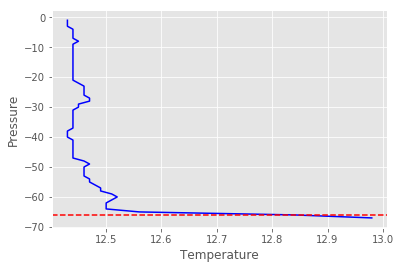

In [214]:
plt.style.use('ggplot')        
plt.plot(df_pts['t'],df_pts['p']*-1,color='blue')
plt.axhline(y=yplottable, color='r', linestyle='--')
plt.xlabel('Temperature')
plt.ylabel('Pressure')        
plt.show()

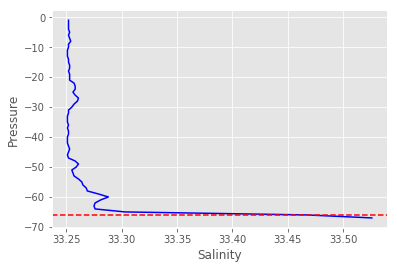

In [215]:
plt.style.use('ggplot')        
plt.plot(df_pts['s'],df_pts['p']*-1,color='blue')
plt.axhline(y=yplottable, color='r', linestyle='--')
plt.xlabel('Salinity')
plt.ylabel('Pressure')        
plt.show()

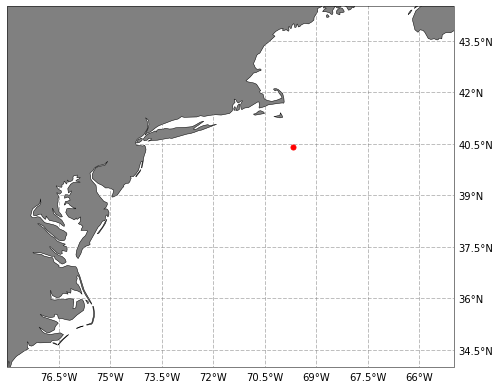

In [216]:
import cartopy; import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.pyplot import *; import cartopy.feature as cfeature
 
lonneg = -1 * lon; lat = 1 * lat

plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-78, -65, 34, 44.5], ccrs.PlateCarree())

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='grey')
ax.add_feature(feature)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER

plt.plot(lonneg, lat,  linewidth=0, markersize=5, marker='o', color='red')
plt.show()